In [1]:
#problem 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def binary_map(x):
    return x.map({'yes':1, "no": 0})

In [3]:
df = pd.DataFrame(pd.read_csv('Housing.csv'))
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist] = df[varlist].apply(binary_map)
del df['furnishingstatus']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [4]:
varlist = ['price','area','bedrooms','bathrooms','stories','parking']
df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [5]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

y = df.values[:,0]
x = df.values[:,1:6]

In [6]:
# y = torch.tensor(y).unsqueeze(1)
# x = torch.tensor(x).unsqueeze(1)
x = torch.tensor(x)
y = torch.tensor(y)
y = y.float()
x = x.float()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)
print(x_train.size())

torch.Size([436, 5])


In [8]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_test, y_train, y_test):
    test_loss_history = []; train_loss_history = []
    for epoch in range(1, n_epochs+1):
        t_p_train = model(x_train)
        loss_train = loss_fn(t_p_train, y_train)
        
        t_p_val = model(x_test)
        loss_val = loss_fn(t_p_val, y_test)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        train_loss_history.append(float(loss_train.detach().numpy()))
        test_loss_history.append(float(loss_val.detach().numpy()))
        
        if epoch == 1 or epoch % 50 == 0:
            print('Epoch %d, Training Loss %f, Validation Loss %f ' % (epoch, float(loss_train),float(loss_val)))
    return train_loss_history, test_loss_history, t_p_train

Epoch 1, Training Loss 0.065318, Validation Loss 0.059736 
Epoch 50, Training Loss 0.026847, Validation Loss 0.025362 
Epoch 100, Training Loss 0.026695, Validation Loss 0.025196 
Epoch 150, Training Loss 0.026637, Validation Loss 0.025123 
Epoch 200, Training Loss 0.026611, Validation Loss 0.025085 


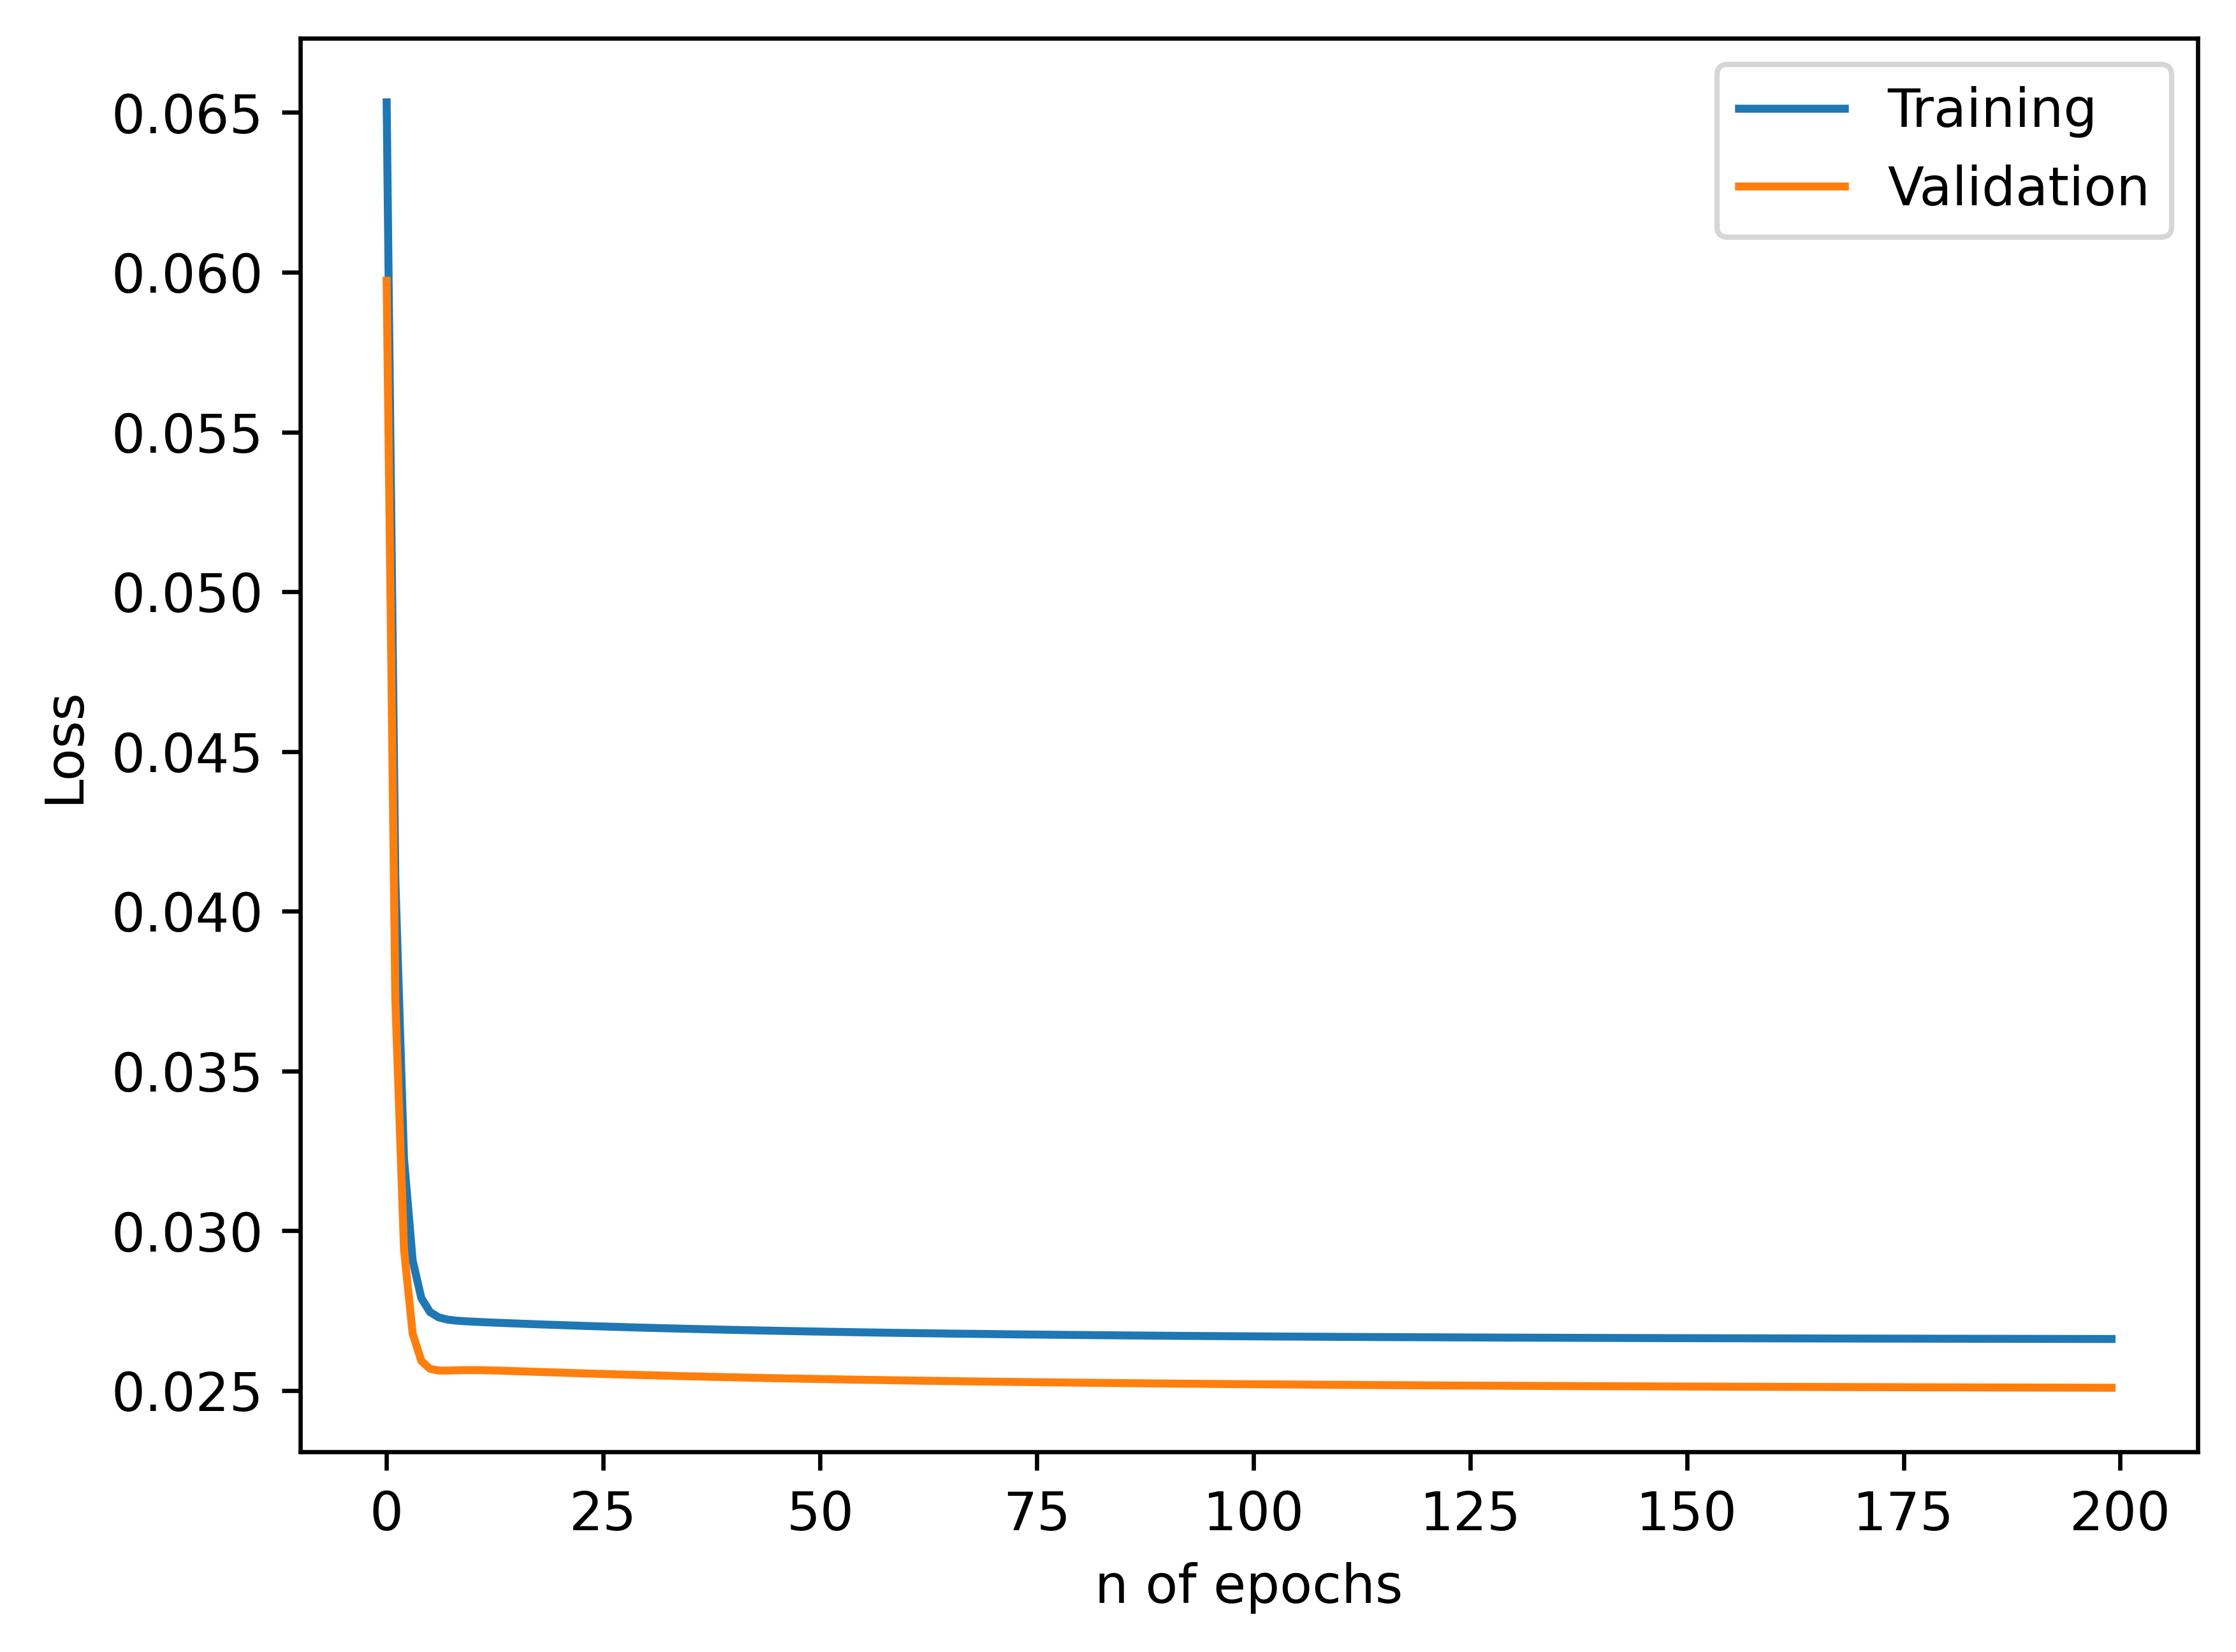

Epoch 1, Training Loss 0.077657, Validation Loss 0.075336 
Epoch 50, Training Loss 0.027597, Validation Loss 0.026041 
Epoch 100, Training Loss 0.027372, Validation Loss 0.025811 
Epoch 150, Training Loss 0.027210, Validation Loss 0.025643 
Epoch 200, Training Loss 0.027090, Validation Loss 0.025518 


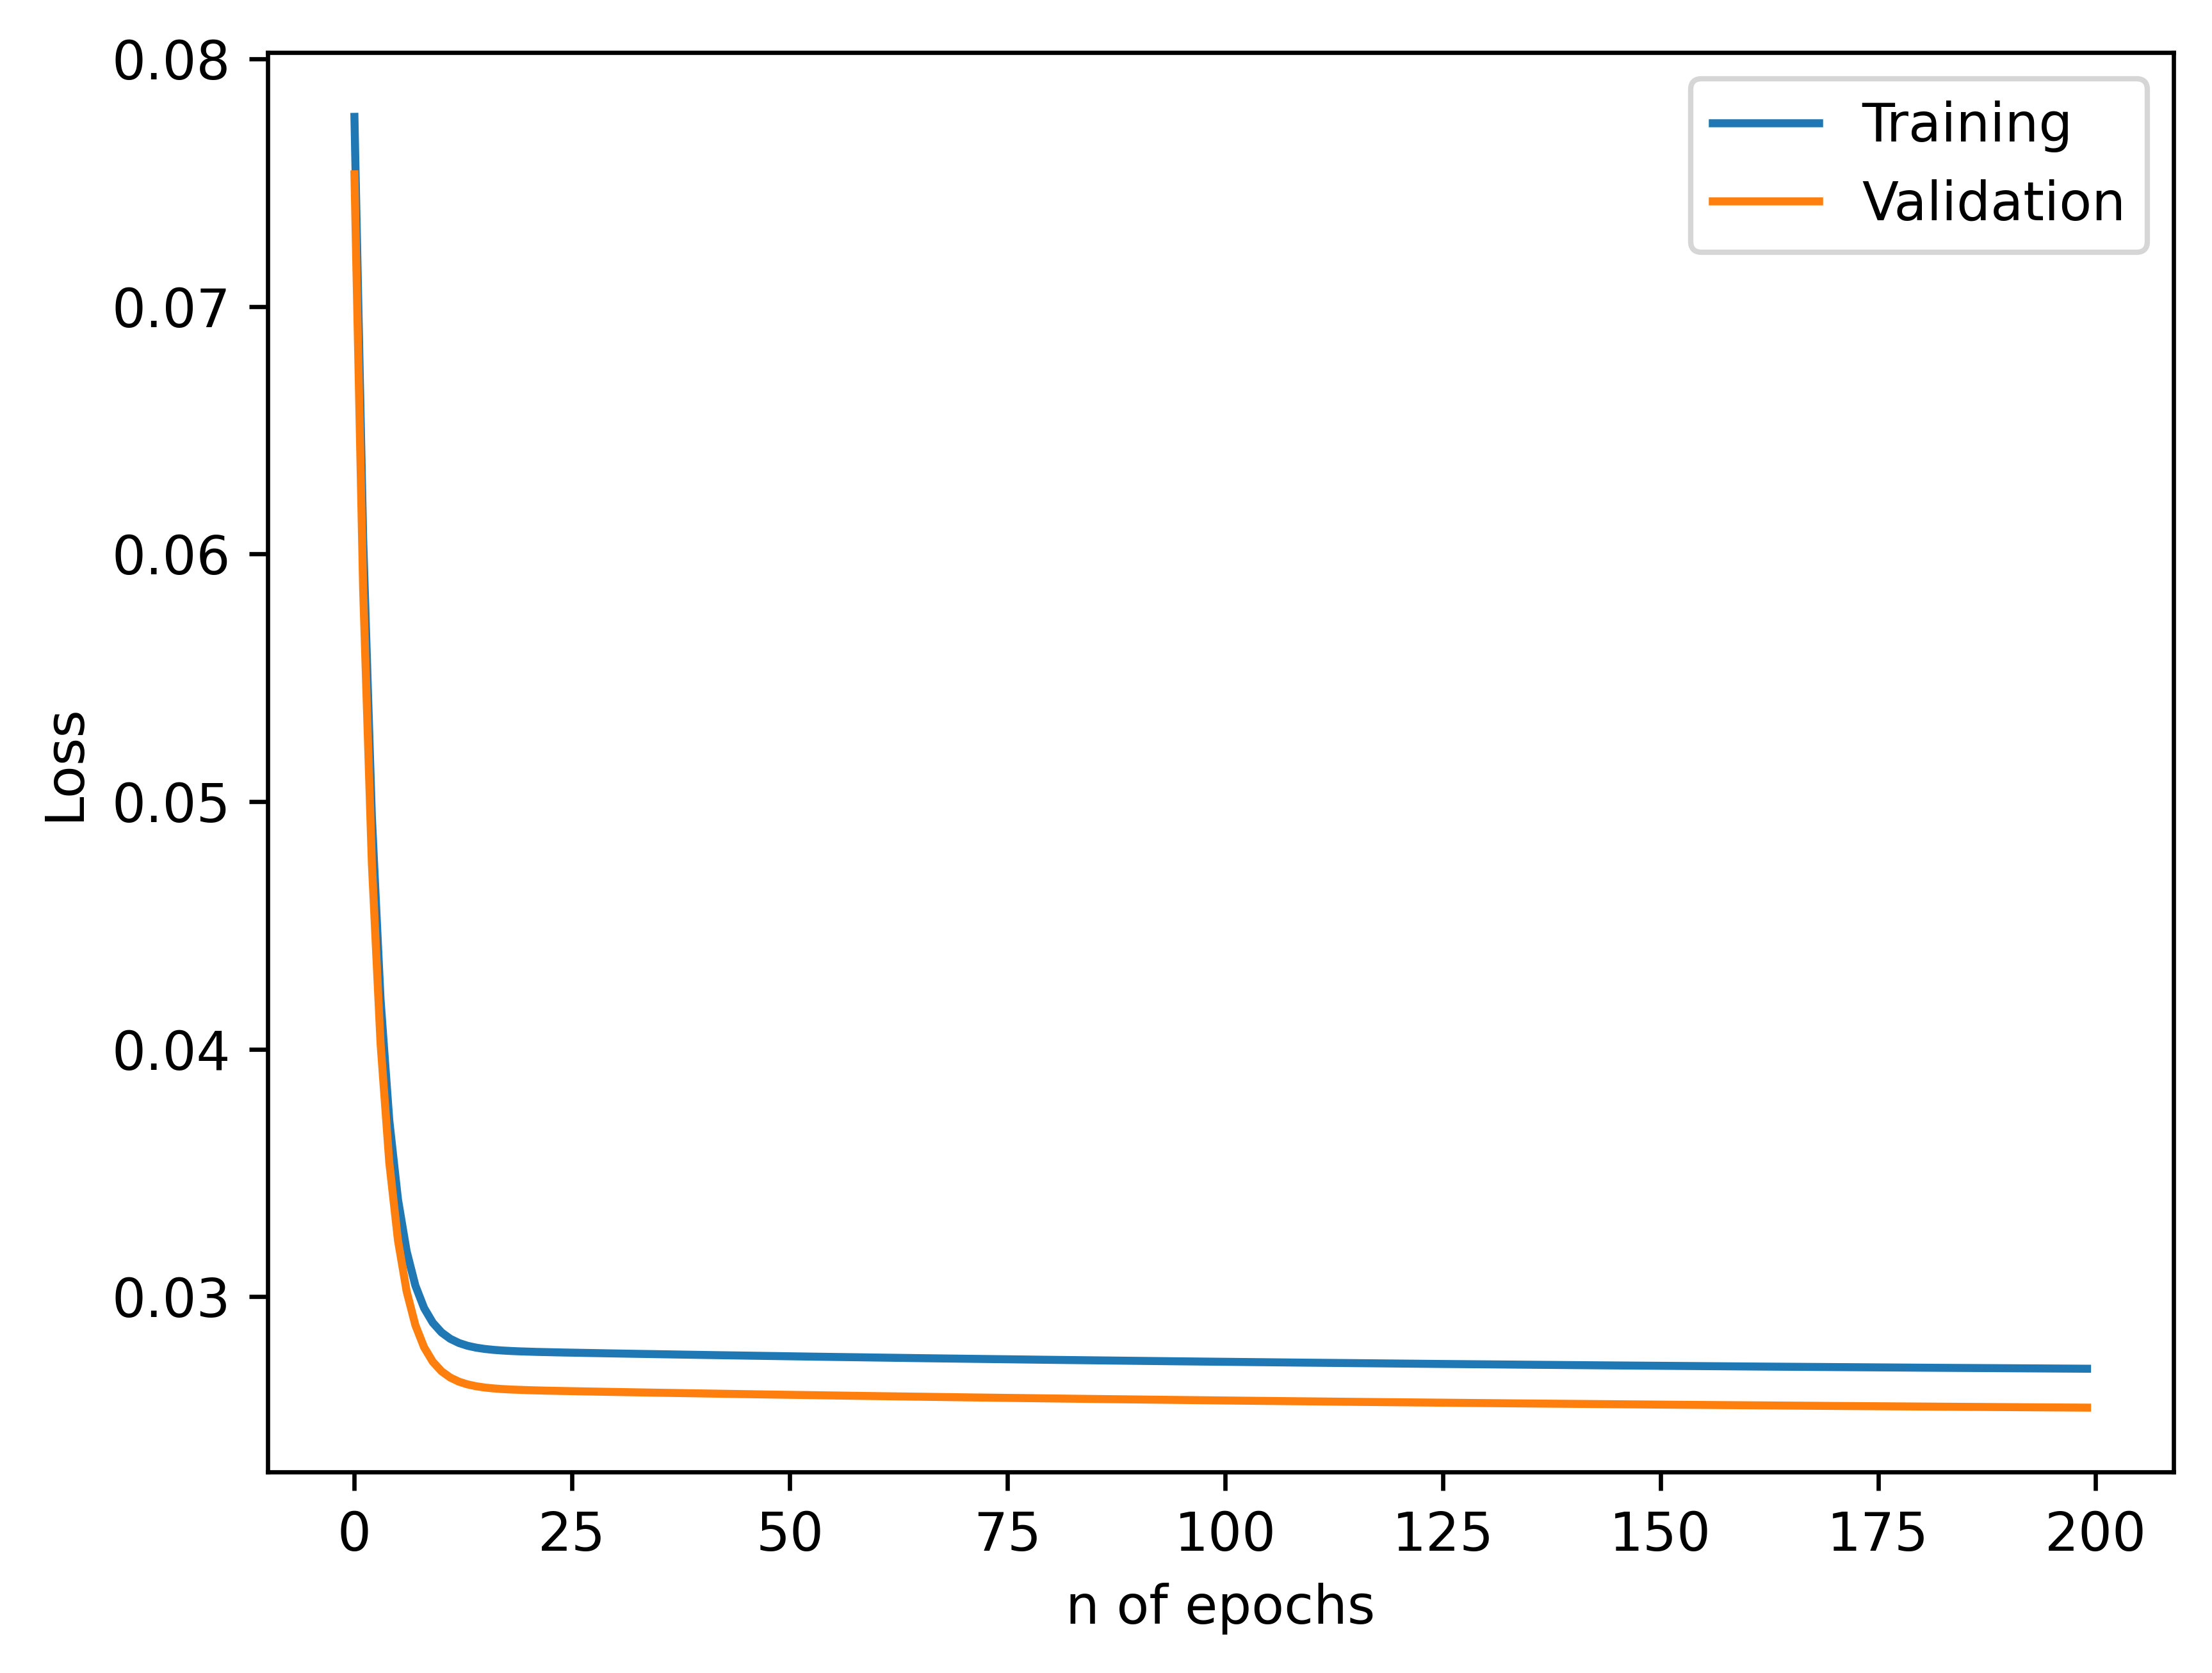

Epoch 1, Training Loss 0.096434, Validation Loss 0.091247 
Epoch 50, Training Loss 0.039235, Validation Loss 0.035968 
Epoch 100, Training Loss 0.036413, Validation Loss 0.033527 
Epoch 150, Training Loss 0.035210, Validation Loss 0.032516 
Epoch 200, Training Loss 0.034223, Validation Loss 0.031672 


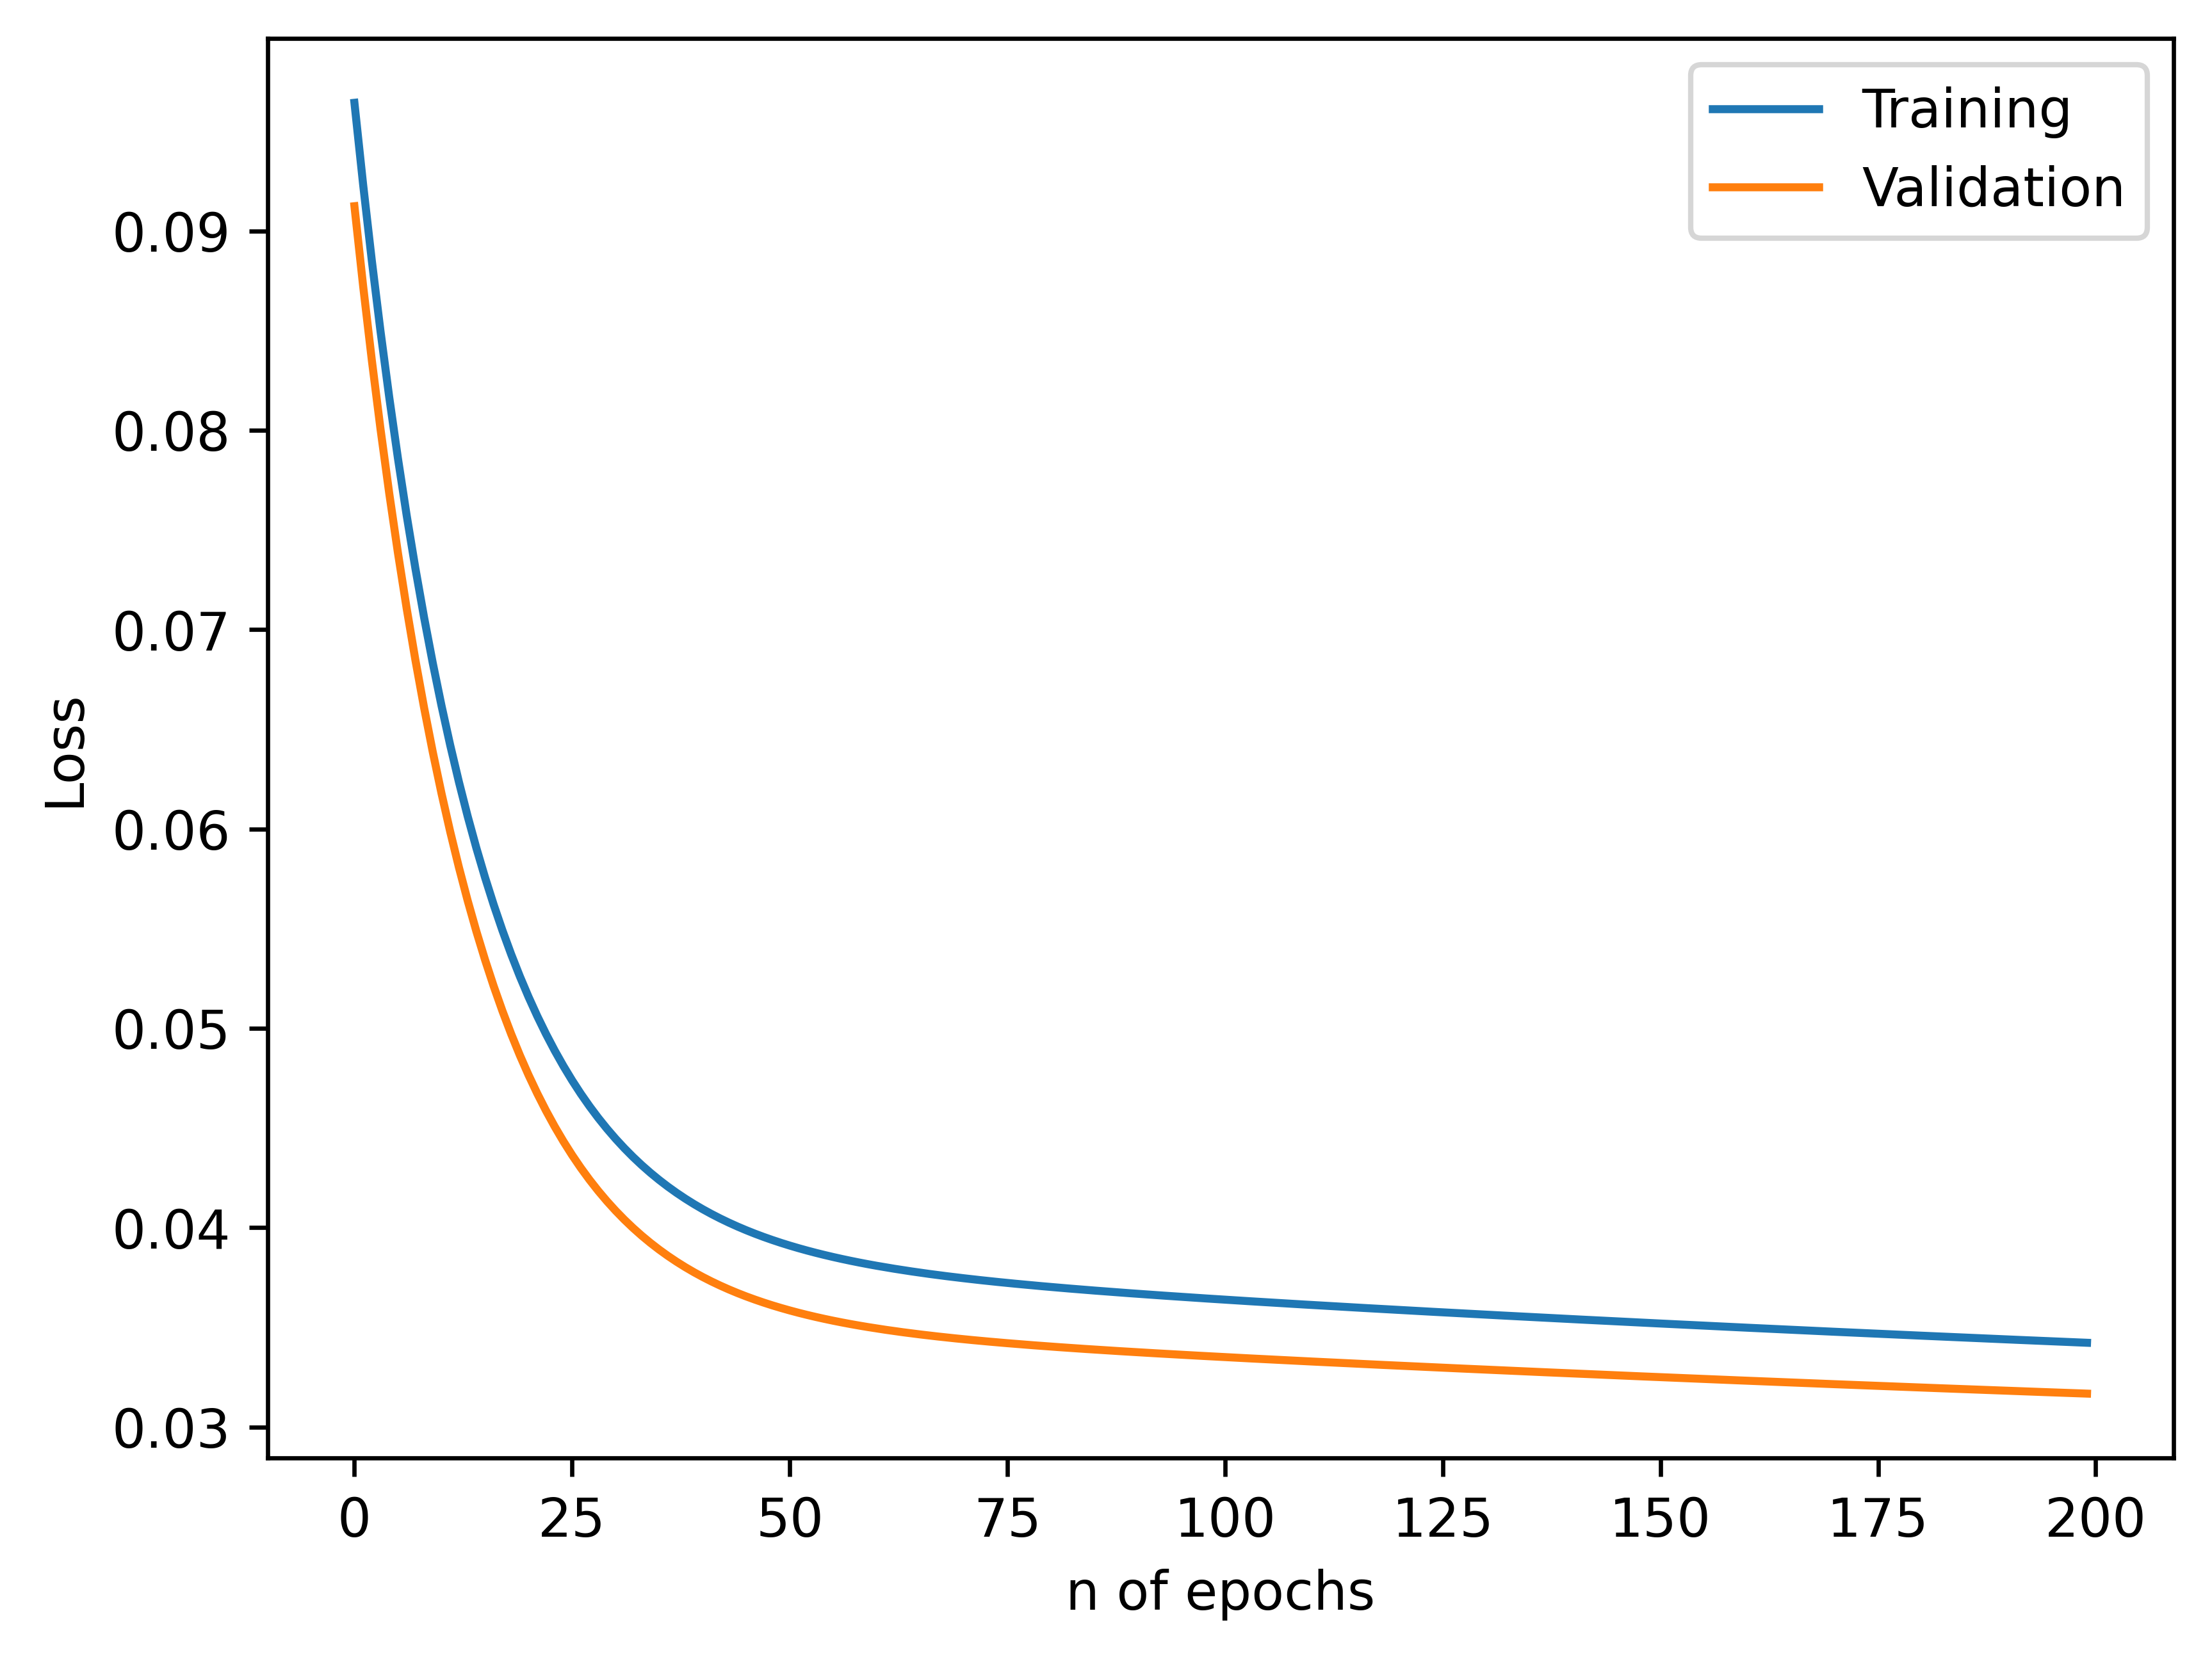

Epoch 1, Training Loss 0.165439, Validation Loss 0.162905 
Epoch 50, Training Loss 0.049201, Validation Loss 0.047502 
Epoch 100, Training Loss 0.032368, Validation Loss 0.030582 
Epoch 150, Training Loss 0.029936, Validation Loss 0.028071 
Epoch 200, Training Loss 0.029498, Validation Loss 0.027606 


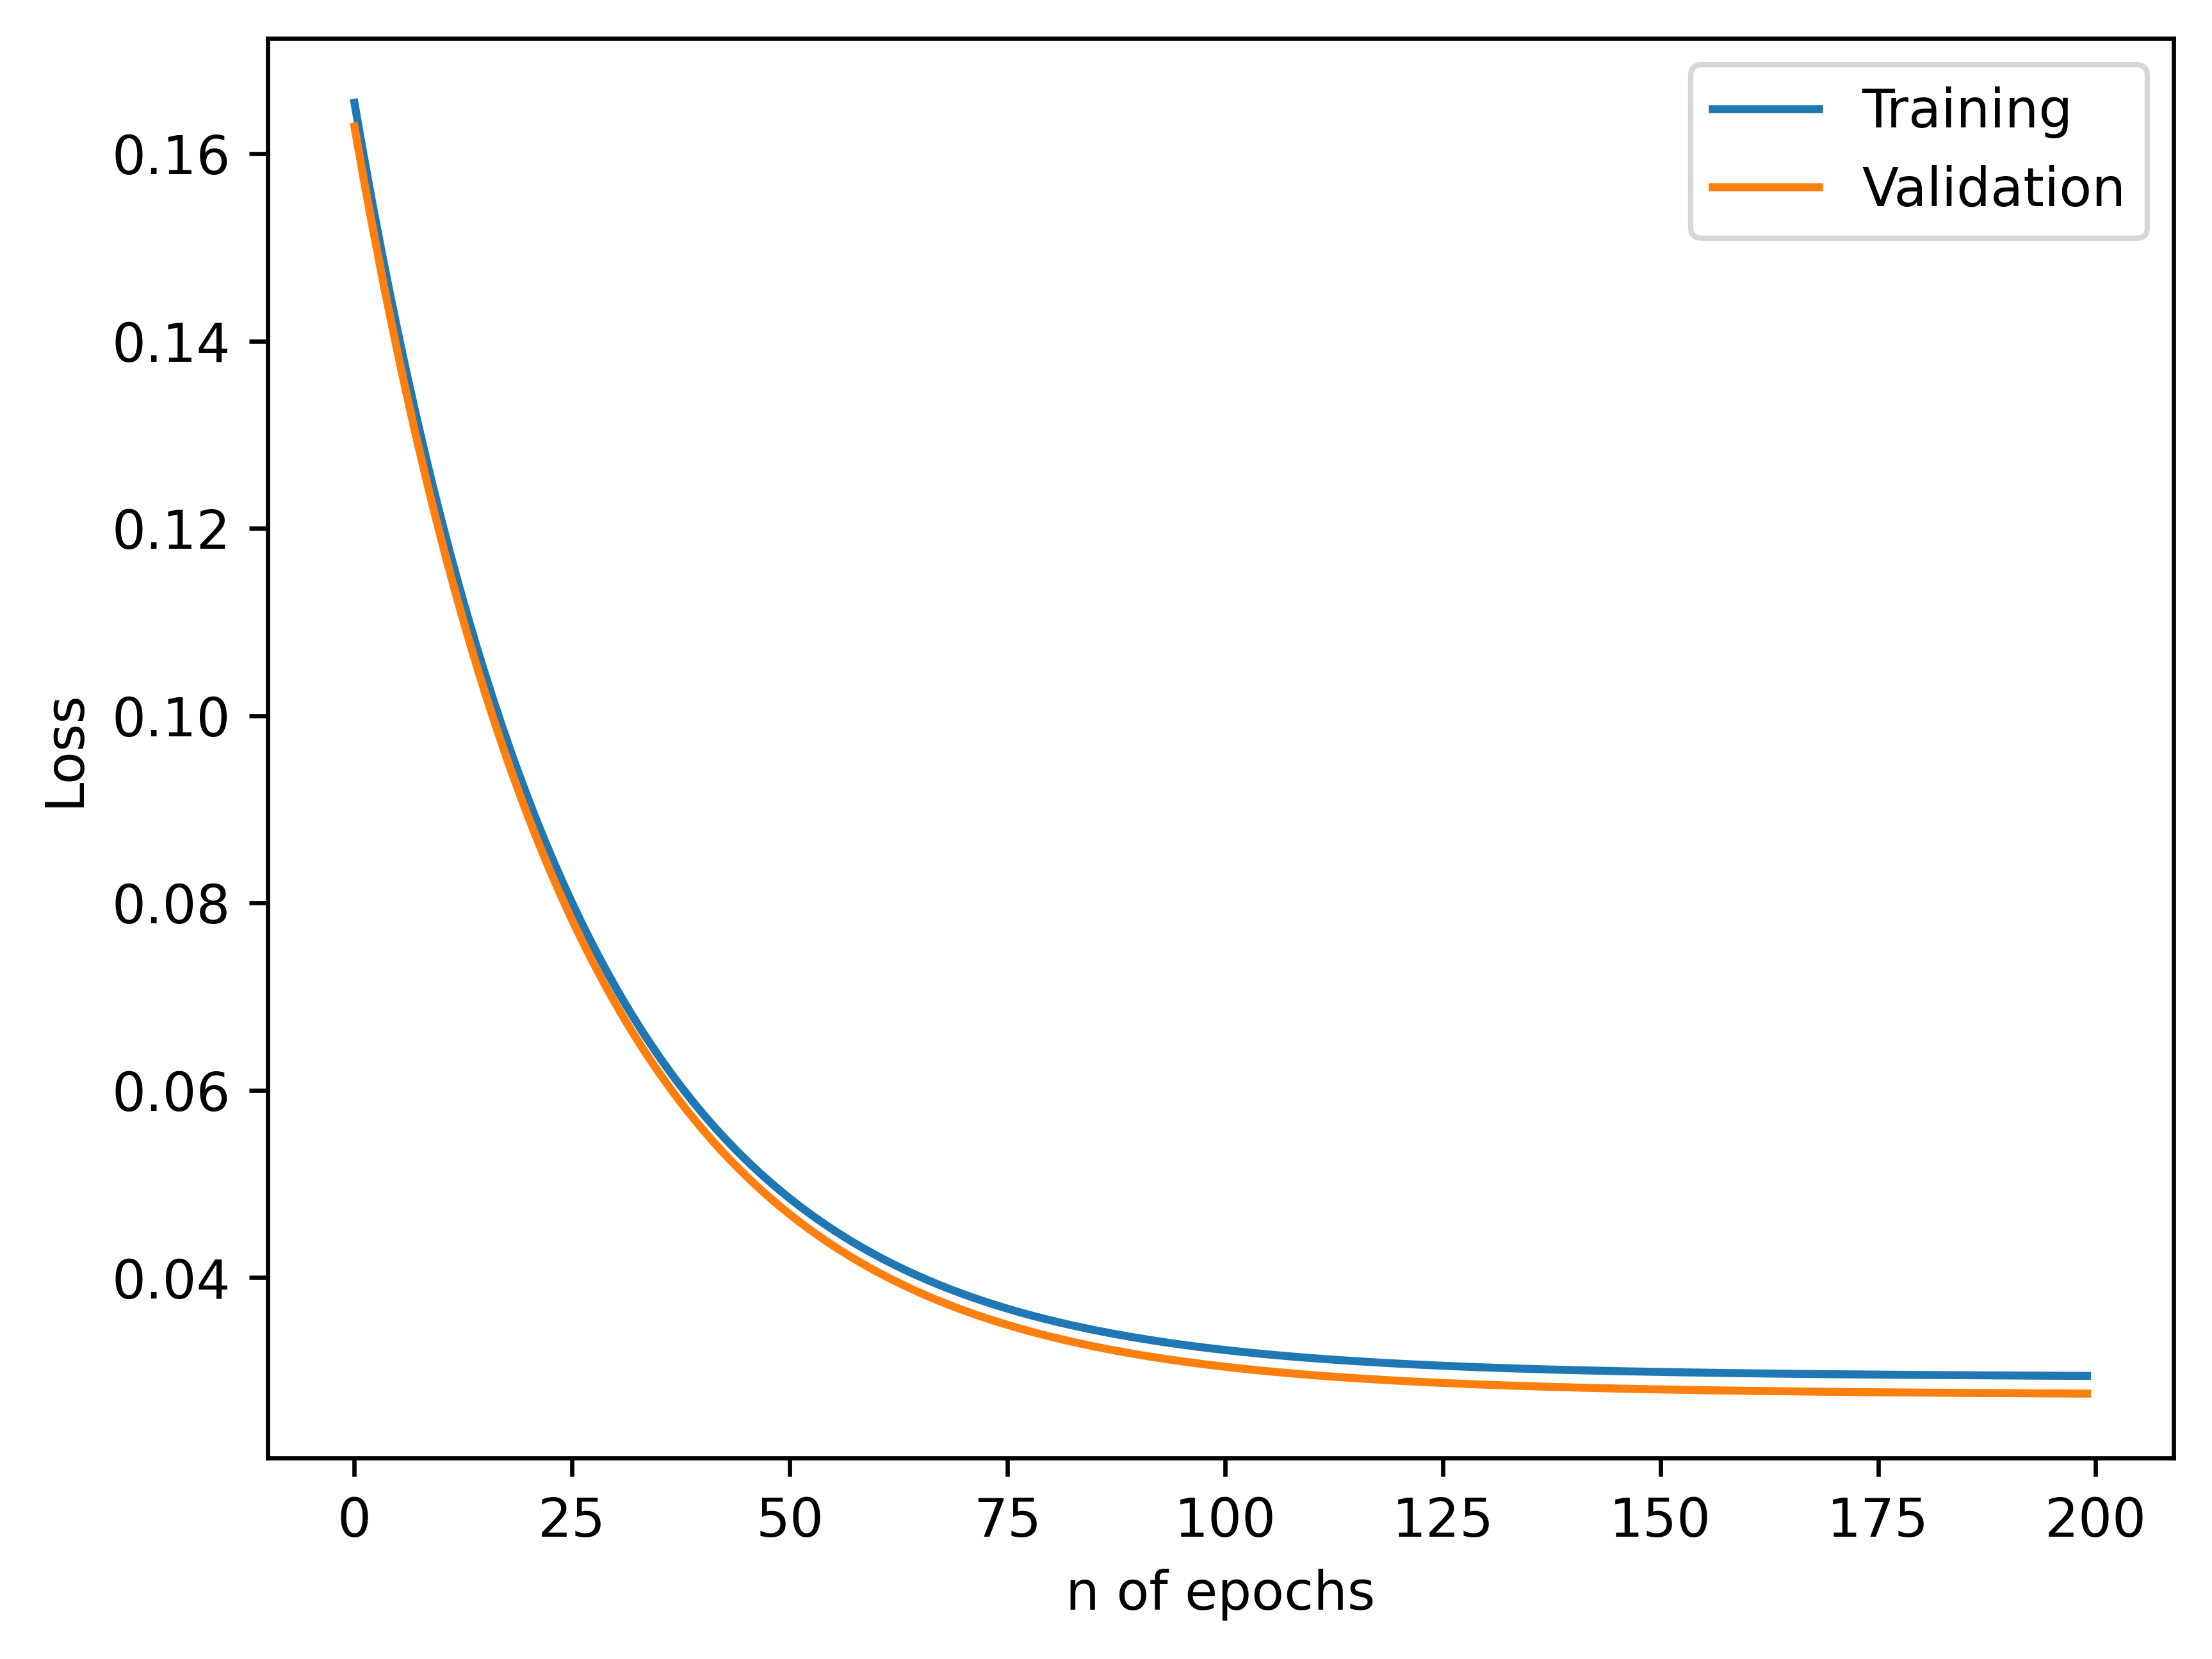

Epoch 1, Training Loss 0.037145, Validation Loss 0.036224 
Epoch 50, Training Loss 0.035088, Validation Loss 0.034045 
Epoch 100, Training Loss 0.033646, Validation Loss 0.032501 
Epoch 150, Training Loss 0.032656, Validation Loss 0.031427 
Epoch 200, Training Loss 0.031974, Validation Loss 0.030676 


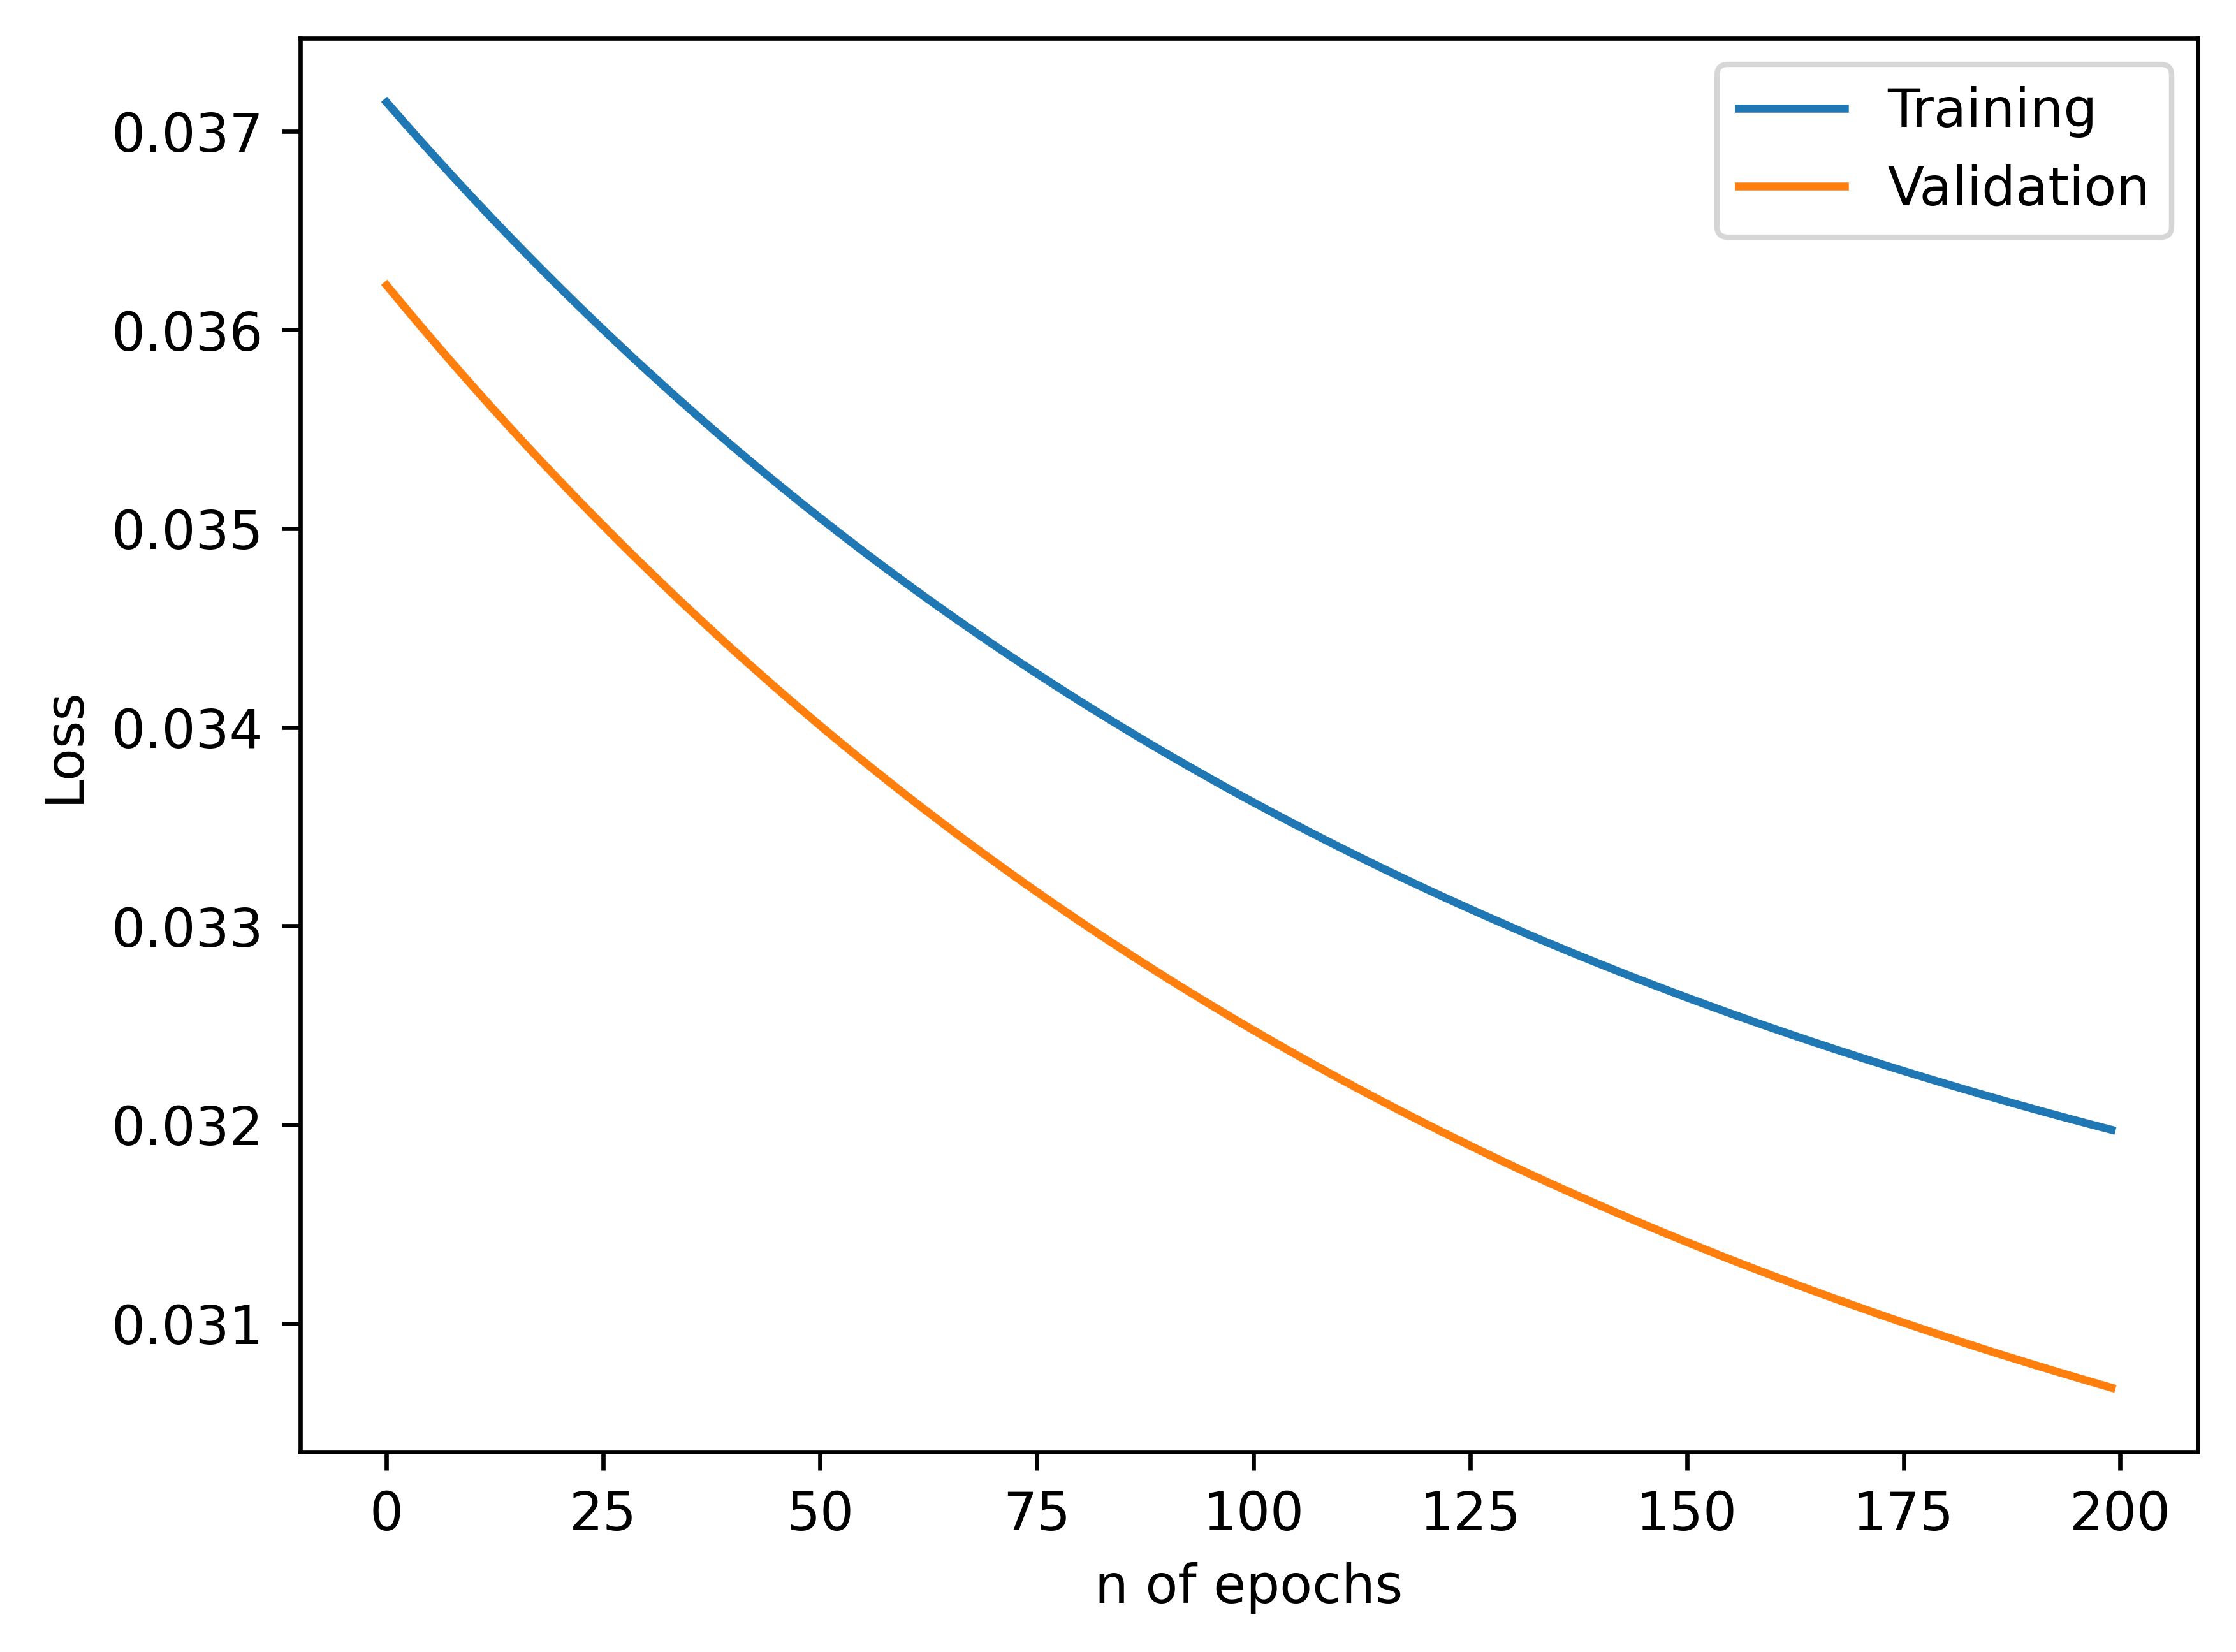

In [10]:
#3a, one hidden layer with 8 nodes
rate = [.1,.05,.01,.005,.001]
min_loss = []
min_loss.append(10000)

for r in rate:
    seq_model1 = nn.Sequential(OrderedDict([('hidden_linear',nn.Linear(5,8)),
                                           ('hidden_activation',nn.Tanh()),
                                           ('output_linear',nn.Linear(8,1))]))

    optimizer = optim.SGD(seq_model1.parameters(), lr=r)

    train_loss, test_loss, train = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model1, loss_fn = loss_fn, x_train = x_train, 
                 x_test = x_test, y_train = y_train, y_test = y_test)

    
    epochs = []
    for n in range(0,200):
        epochs.append(n)

    fig = plt.figure(dpi=600)
    plt.plot(epochs, train_loss, label = 'Training')
    plt.plot(epochs, test_loss, label = 'Validation')
    plt.ylabel("Loss")
    plt.xlabel("n of epochs")
    plt.legend()
    plt.show()

Epoch 1, Training Loss 0.074798, Validation Loss 0.074861 
Epoch 50, Training Loss 0.028805, Validation Loss 0.026809 
Epoch 100, Training Loss 0.027882, Validation Loss 0.026066 
Epoch 150, Training Loss 0.027375, Validation Loss 0.025655 
Epoch 200, Training Loss 0.027082, Validation Loss 0.025416 


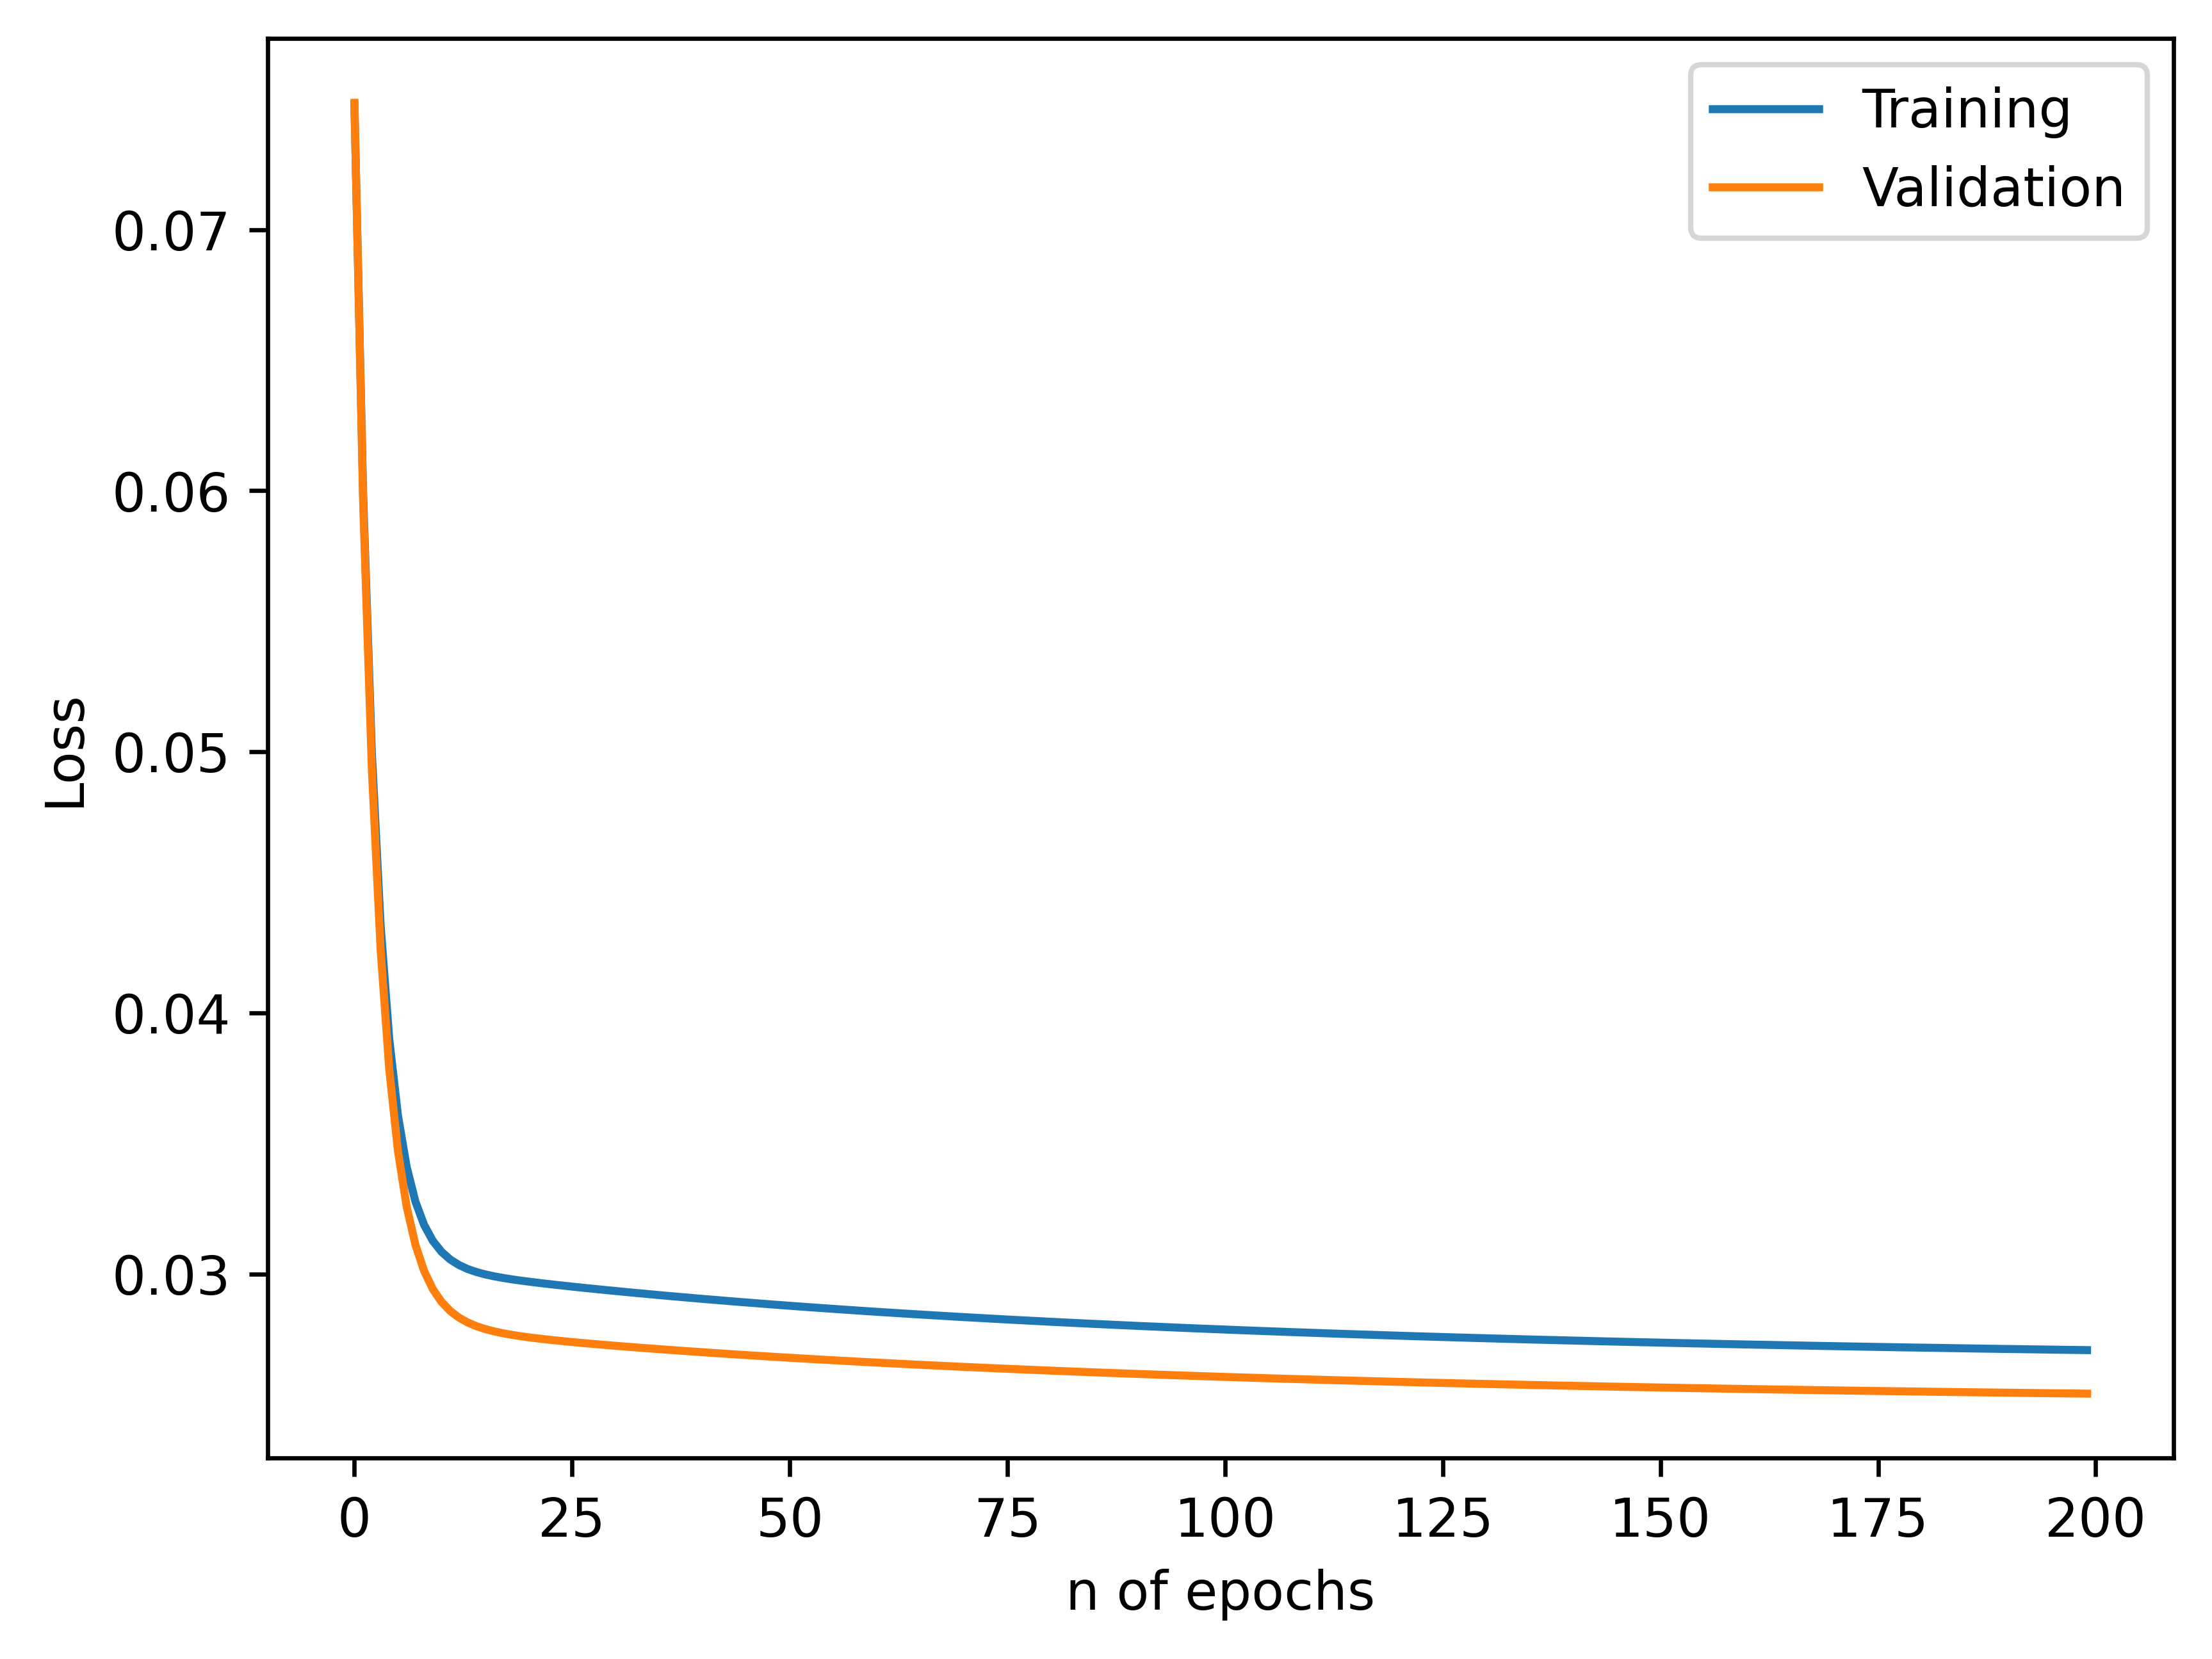

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)
Parameter containing:
tensor([0.0845], requires_grad=True)


In [19]:
#3a, Using the best learning rate to minmize overfitting and optimize loss
r = .05
seq_model3a = nn.Sequential(OrderedDict([('hidden_linear',nn.Linear(5,8)),
                                       ('hidden_activation',nn.Tanh()),
                                       ('output_linear',nn.Linear(8,1))]))

optimizer = optim.SGD(seq_model3a.parameters(), lr=r)

train_loss, test_loss, train = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model3a, loss_fn = loss_fn, x_train = x_train, 
             x_test = x_test, y_train = y_train, y_test = y_test)


epochs = []
for n in range(0,200):
    epochs.append(n)

fig = plt.figure(dpi=600)
plt.plot(epochs, train_loss, label = 'Training')
plt.plot(epochs, test_loss, label = 'Validation')
plt.ylabel("Loss")
plt.xlabel("n of epochs")
plt.legend()
plt.show() 

print(seq_model1)
print(seq_model1.output_linear.bias)

Epoch 1, Training Loss 0.136934, Validation Loss 0.132064 
Epoch 50, Training Loss 0.026545, Validation Loss 0.024967 
Epoch 100, Training Loss 0.026532, Validation Loss 0.024957 
Epoch 150, Training Loss 0.026523, Validation Loss 0.024951 
Epoch 200, Training Loss 0.026518, Validation Loss 0.024947 


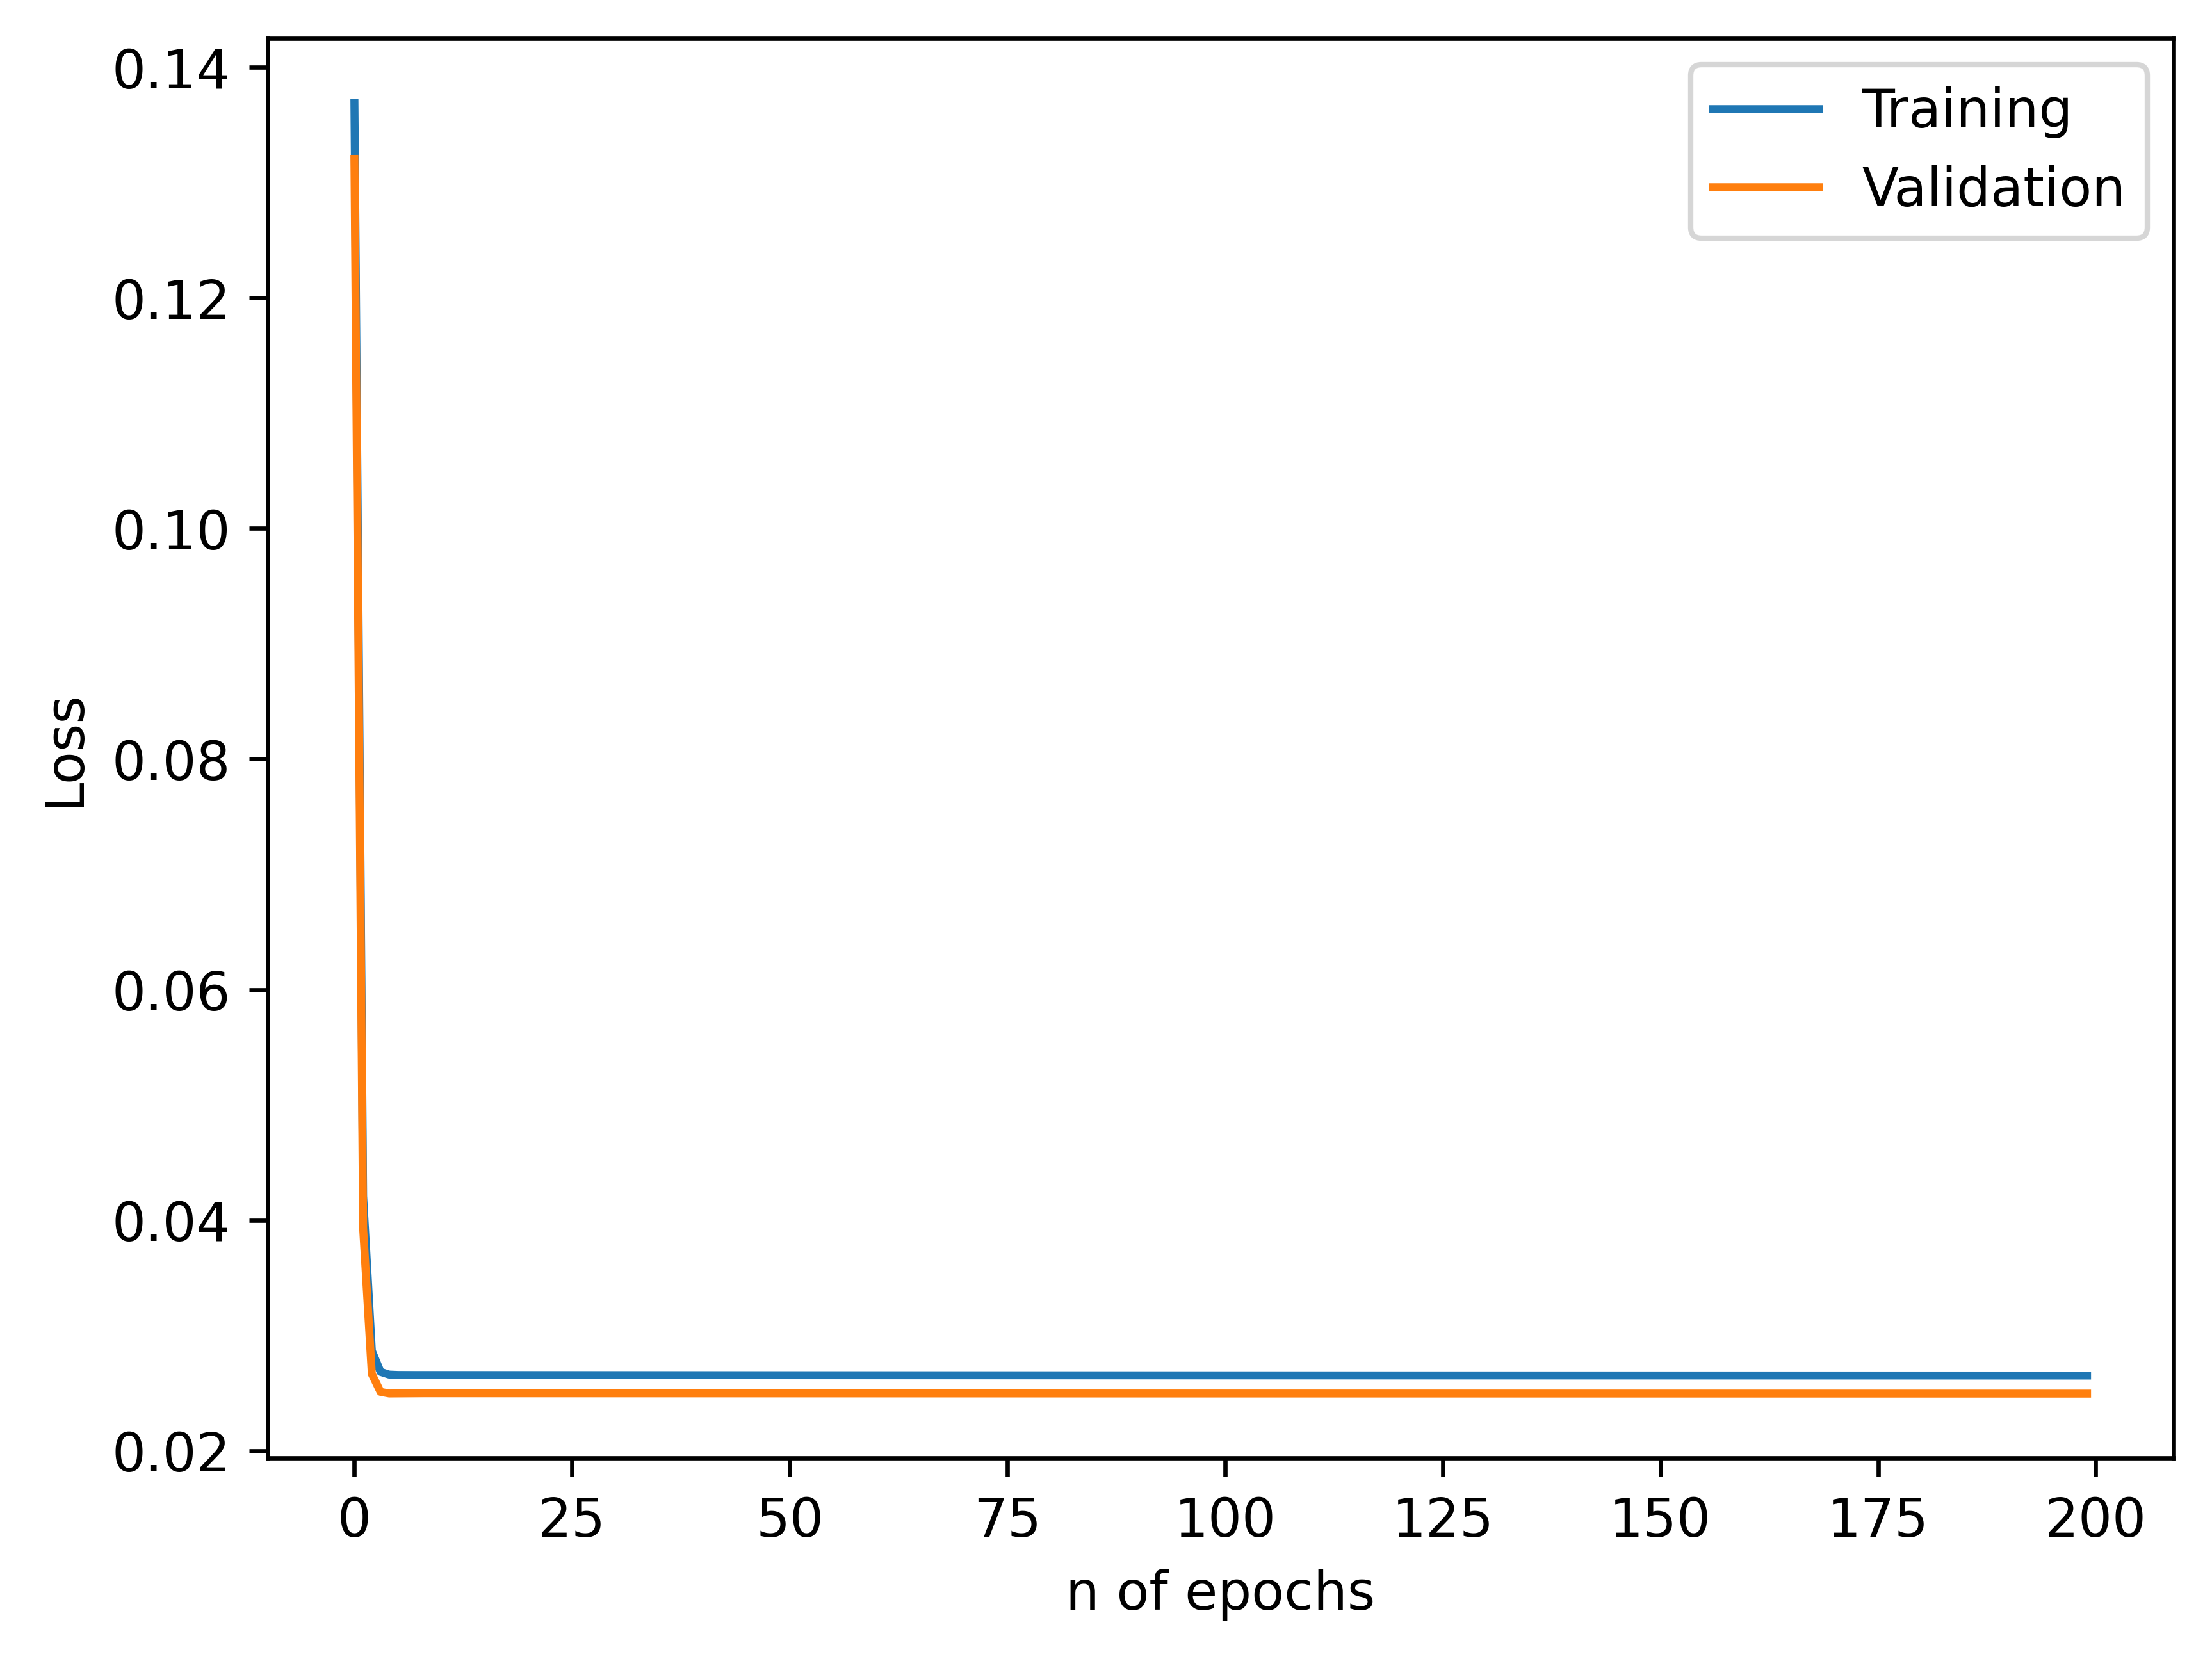

Epoch 1, Training Loss 0.102816, Validation Loss 0.098253 
Epoch 50, Training Loss 0.026551, Validation Loss 0.024973 
Epoch 100, Training Loss 0.026546, Validation Loss 0.024971 
Epoch 150, Training Loss 0.026542, Validation Loss 0.024969 
Epoch 200, Training Loss 0.026539, Validation Loss 0.024968 


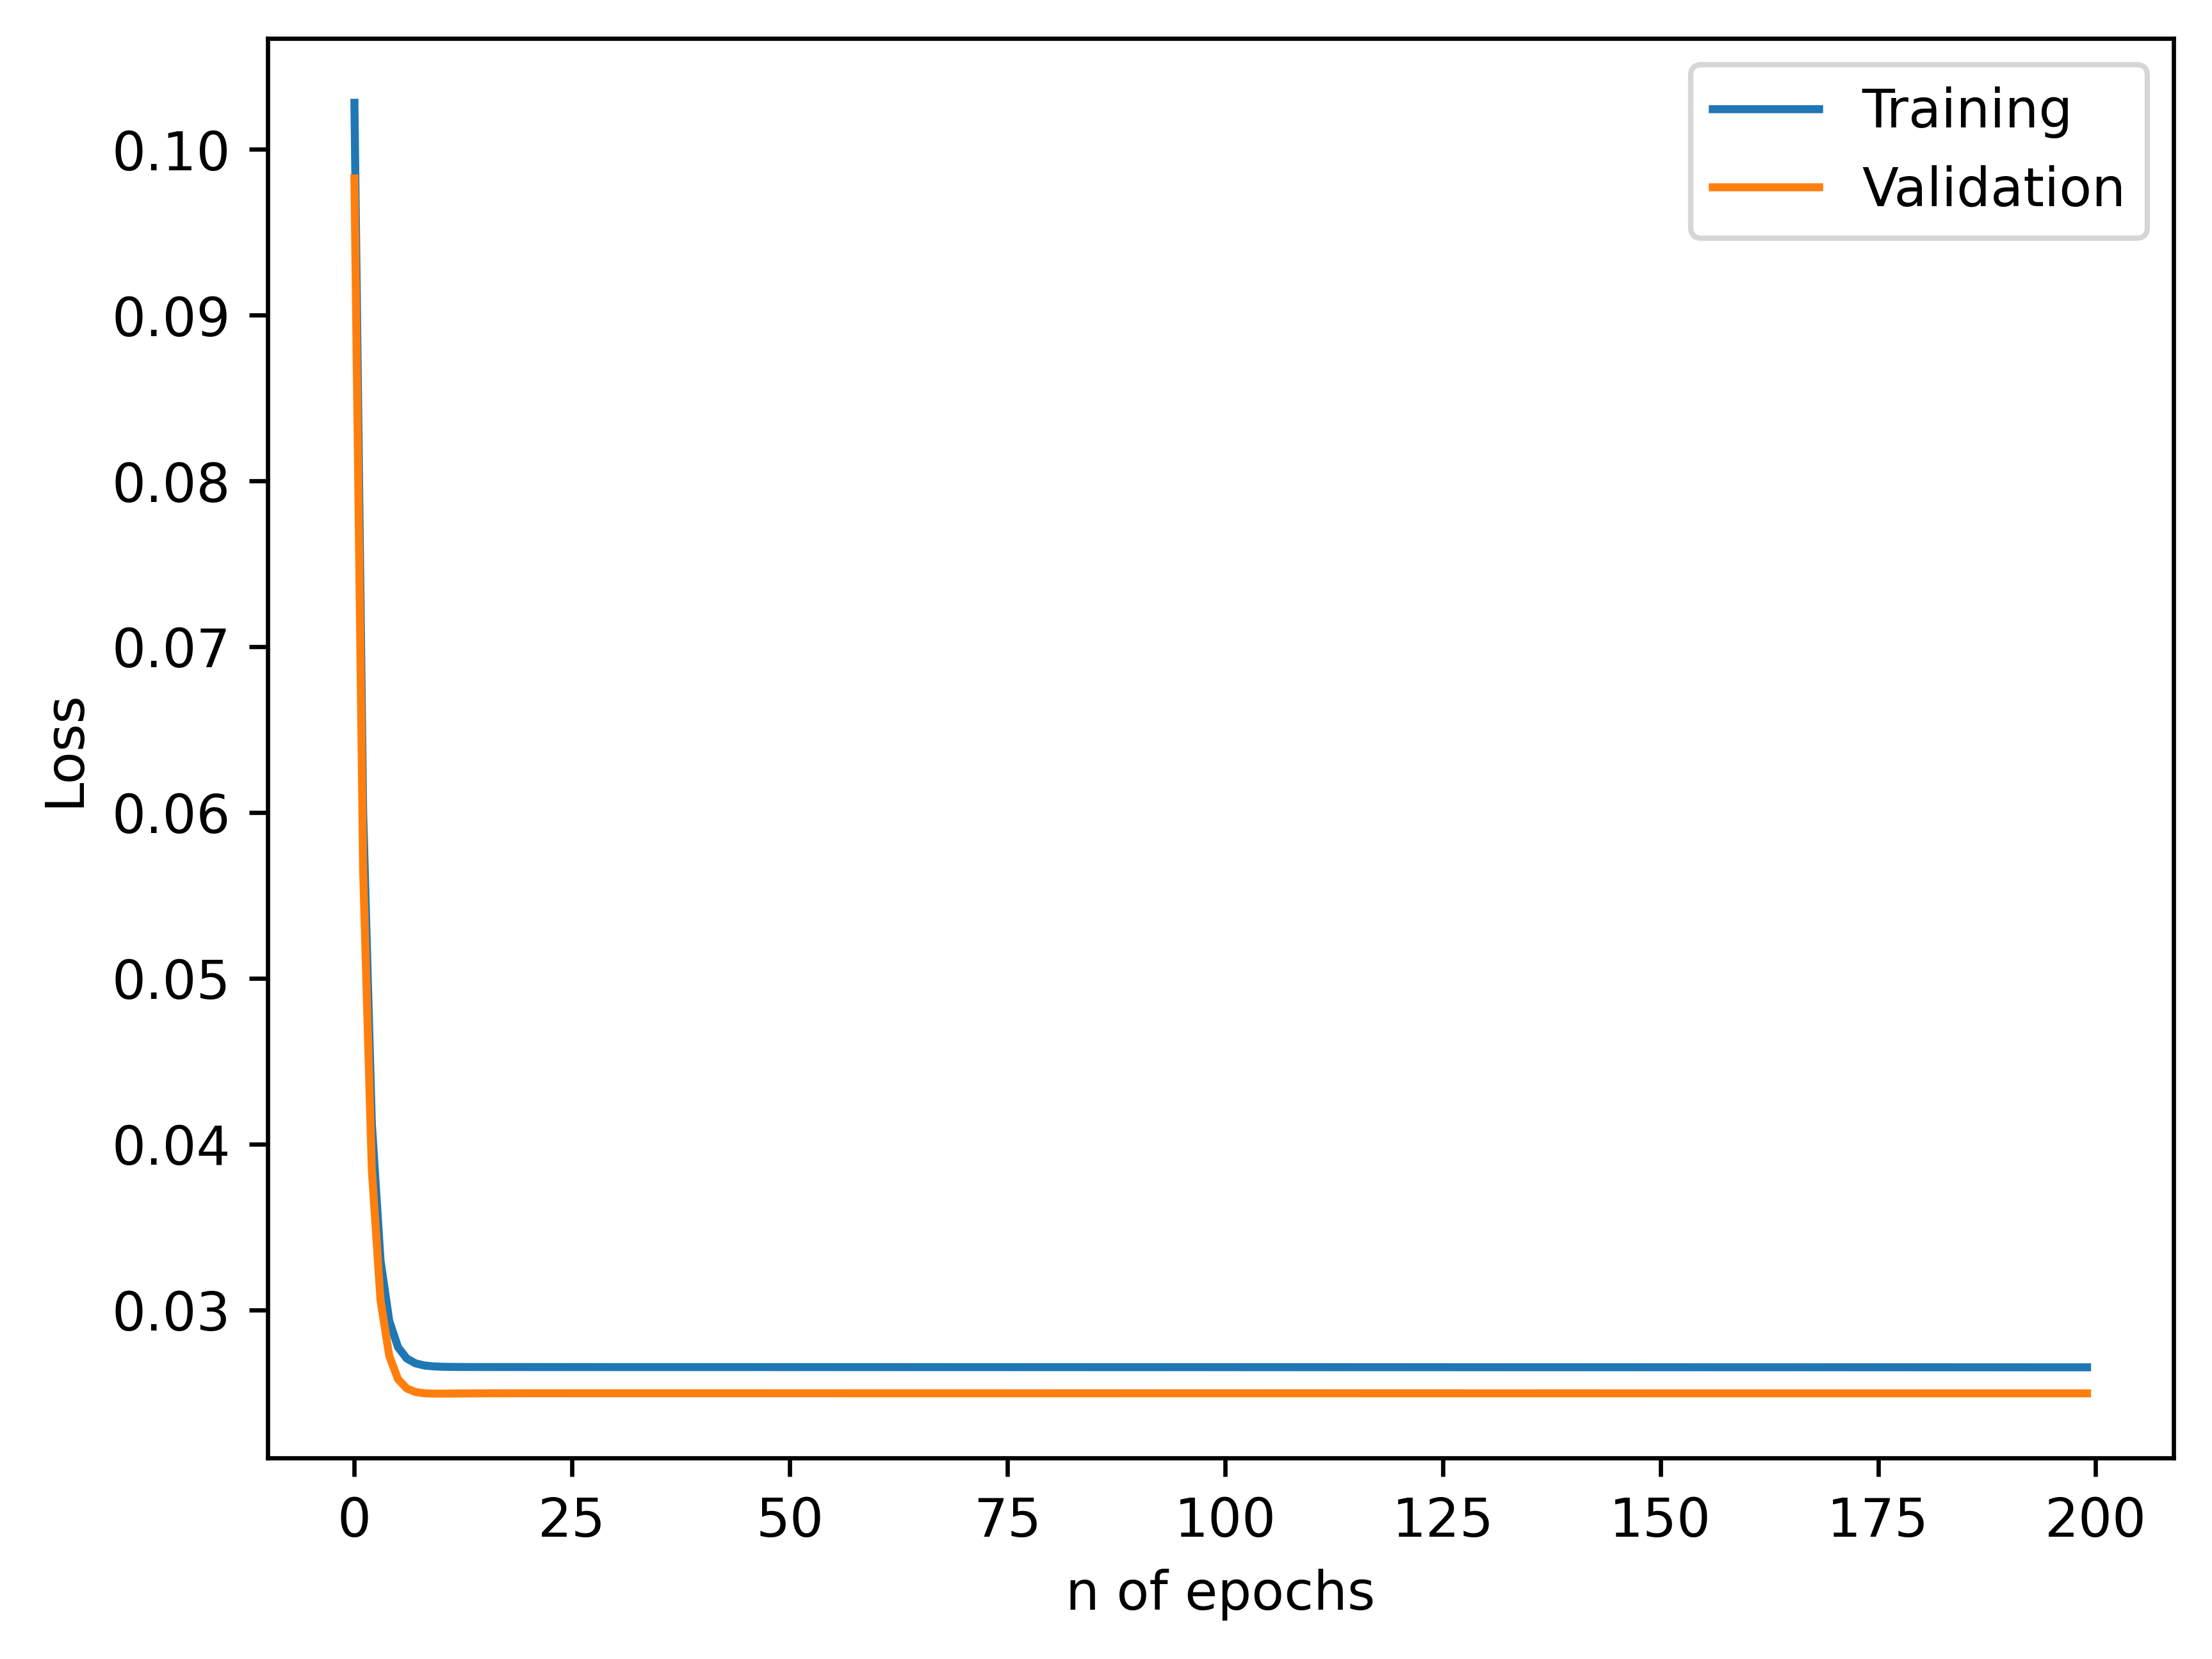

Epoch 1, Training Loss 0.107957, Validation Loss 0.103662 
Epoch 50, Training Loss 0.026833, Validation Loss 0.025168 
Epoch 100, Training Loss 0.026725, Validation Loss 0.025141 
Epoch 150, Training Loss 0.026714, Validation Loss 0.025132 
Epoch 200, Training Loss 0.026703, Validation Loss 0.025122 


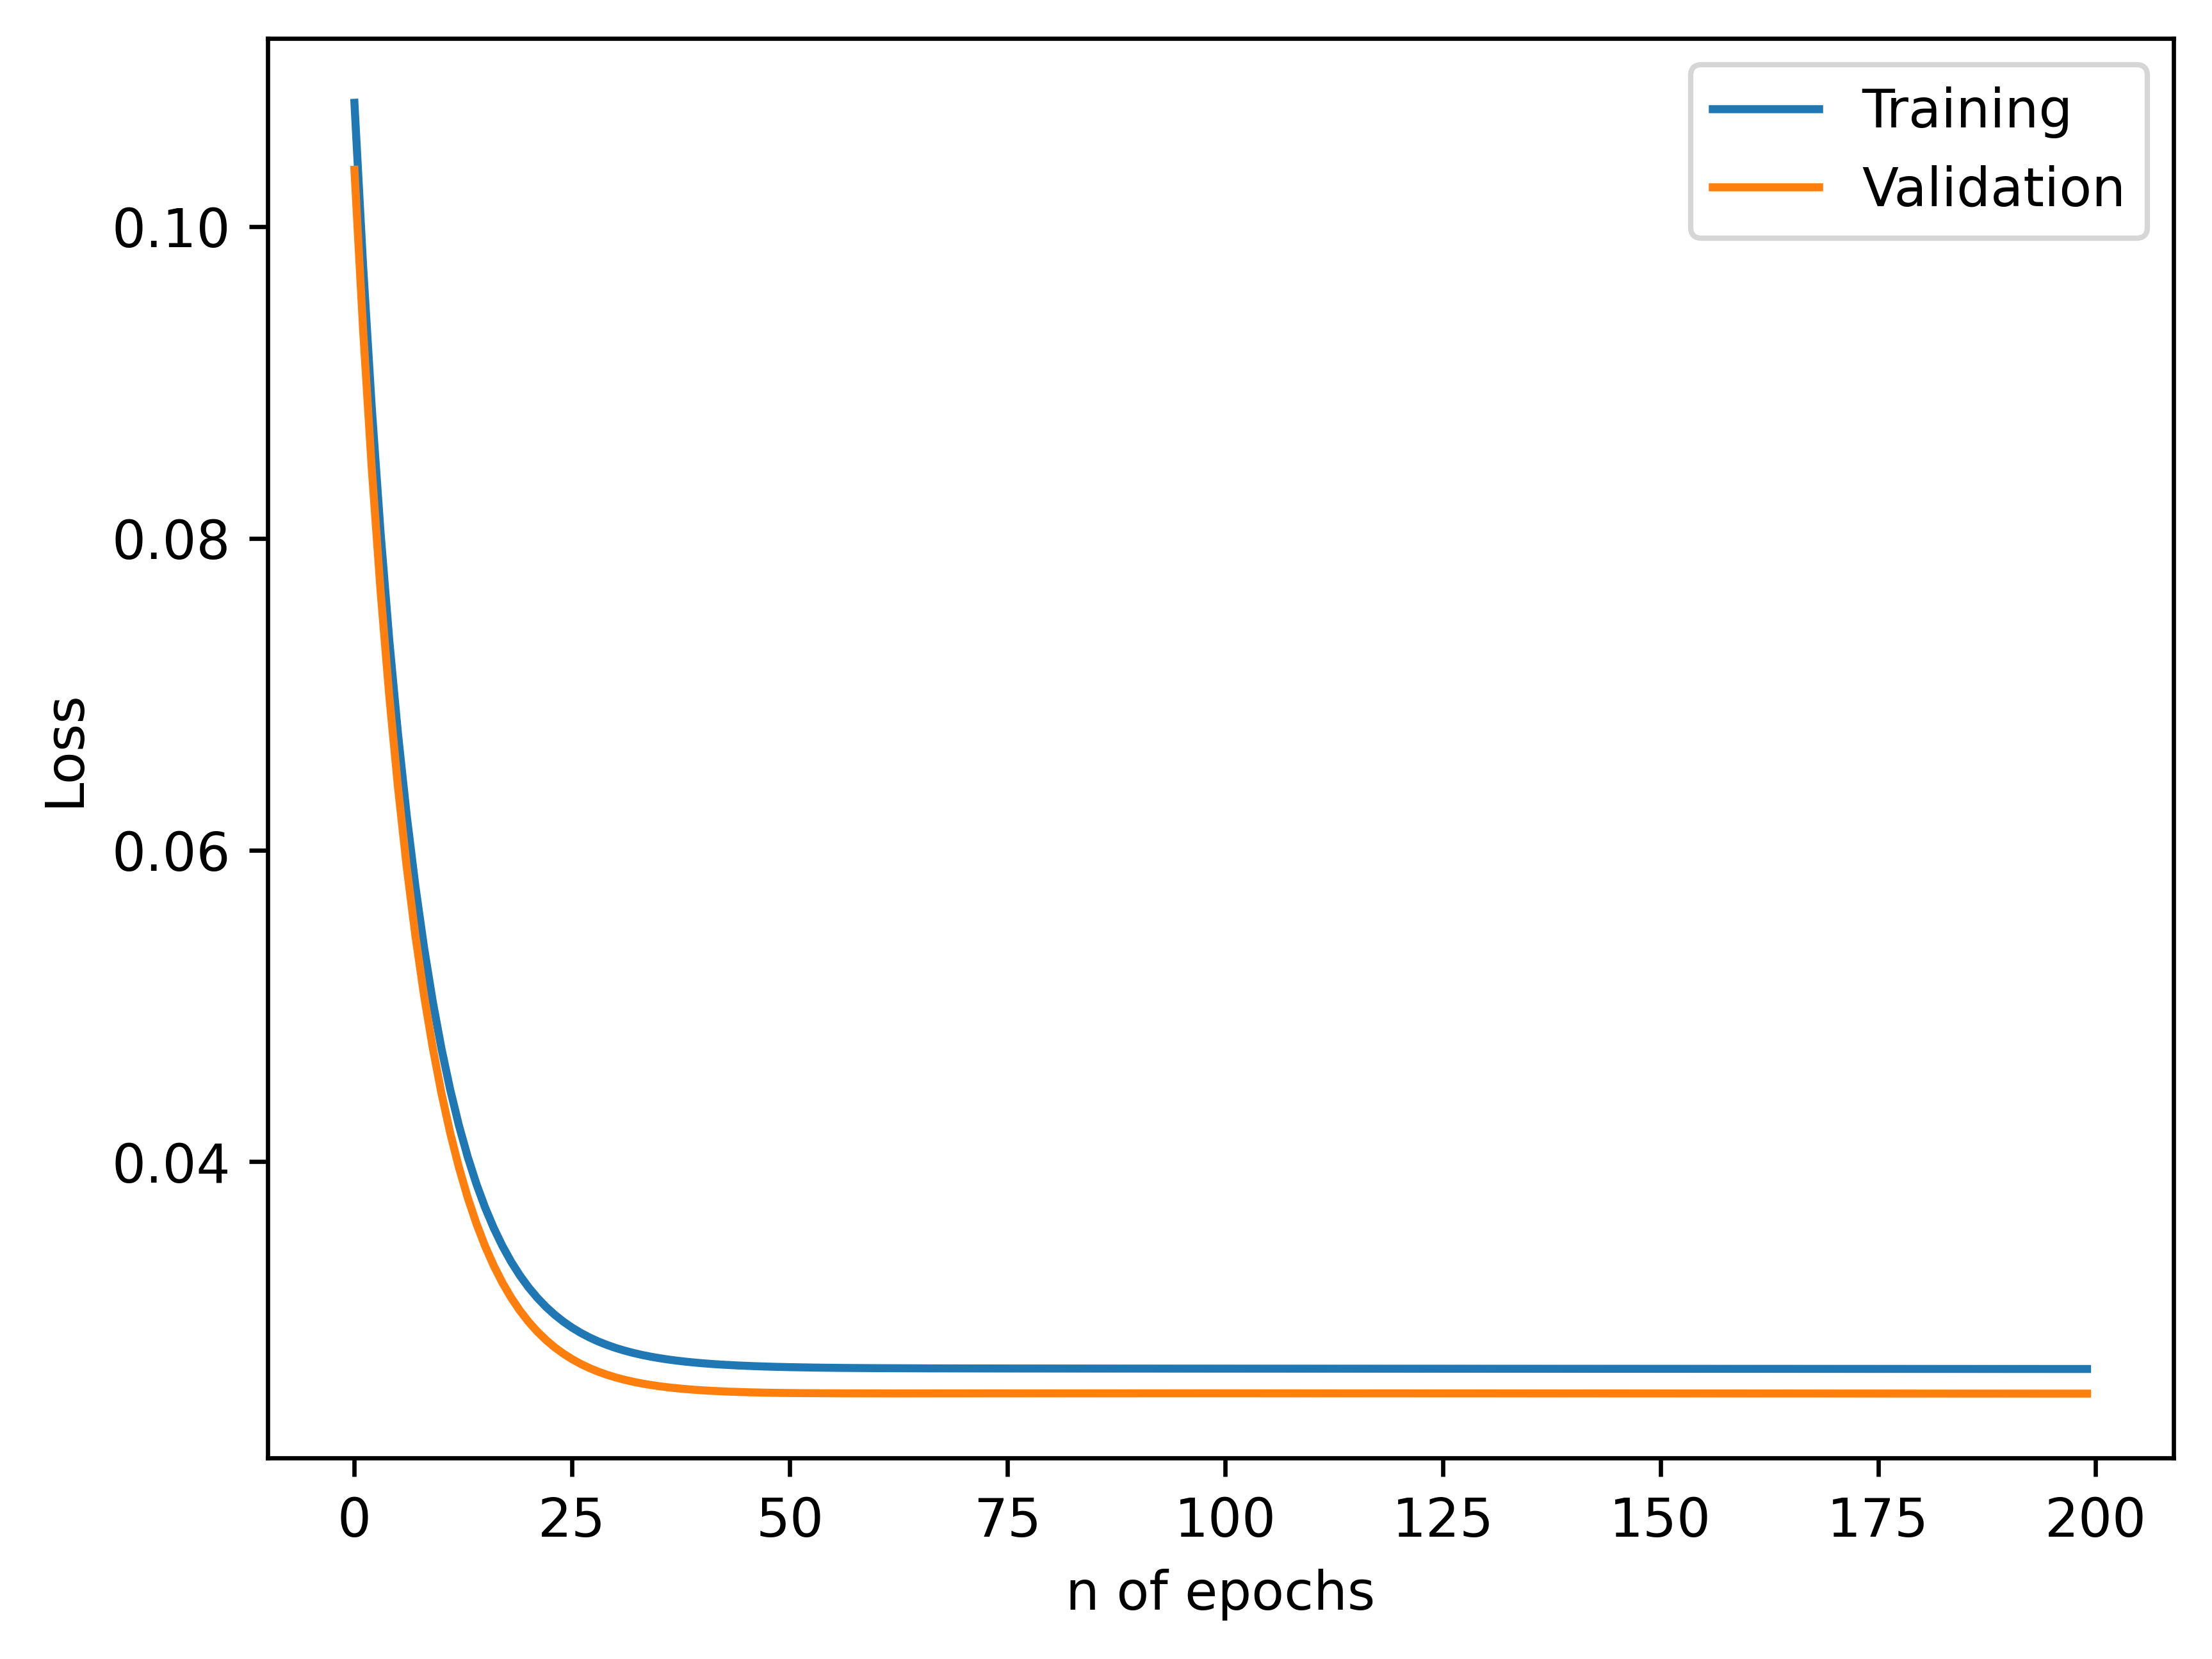

Epoch 1, Training Loss 0.123333, Validation Loss 0.118349 
Epoch 50, Training Loss 0.030553, Validation Loss 0.028273 
Epoch 100, Training Loss 0.026655, Validation Loss 0.024956 
Epoch 150, Training Loss 0.026514, Validation Loss 0.024927 
Epoch 200, Training Loss 0.026509, Validation Loss 0.024942 


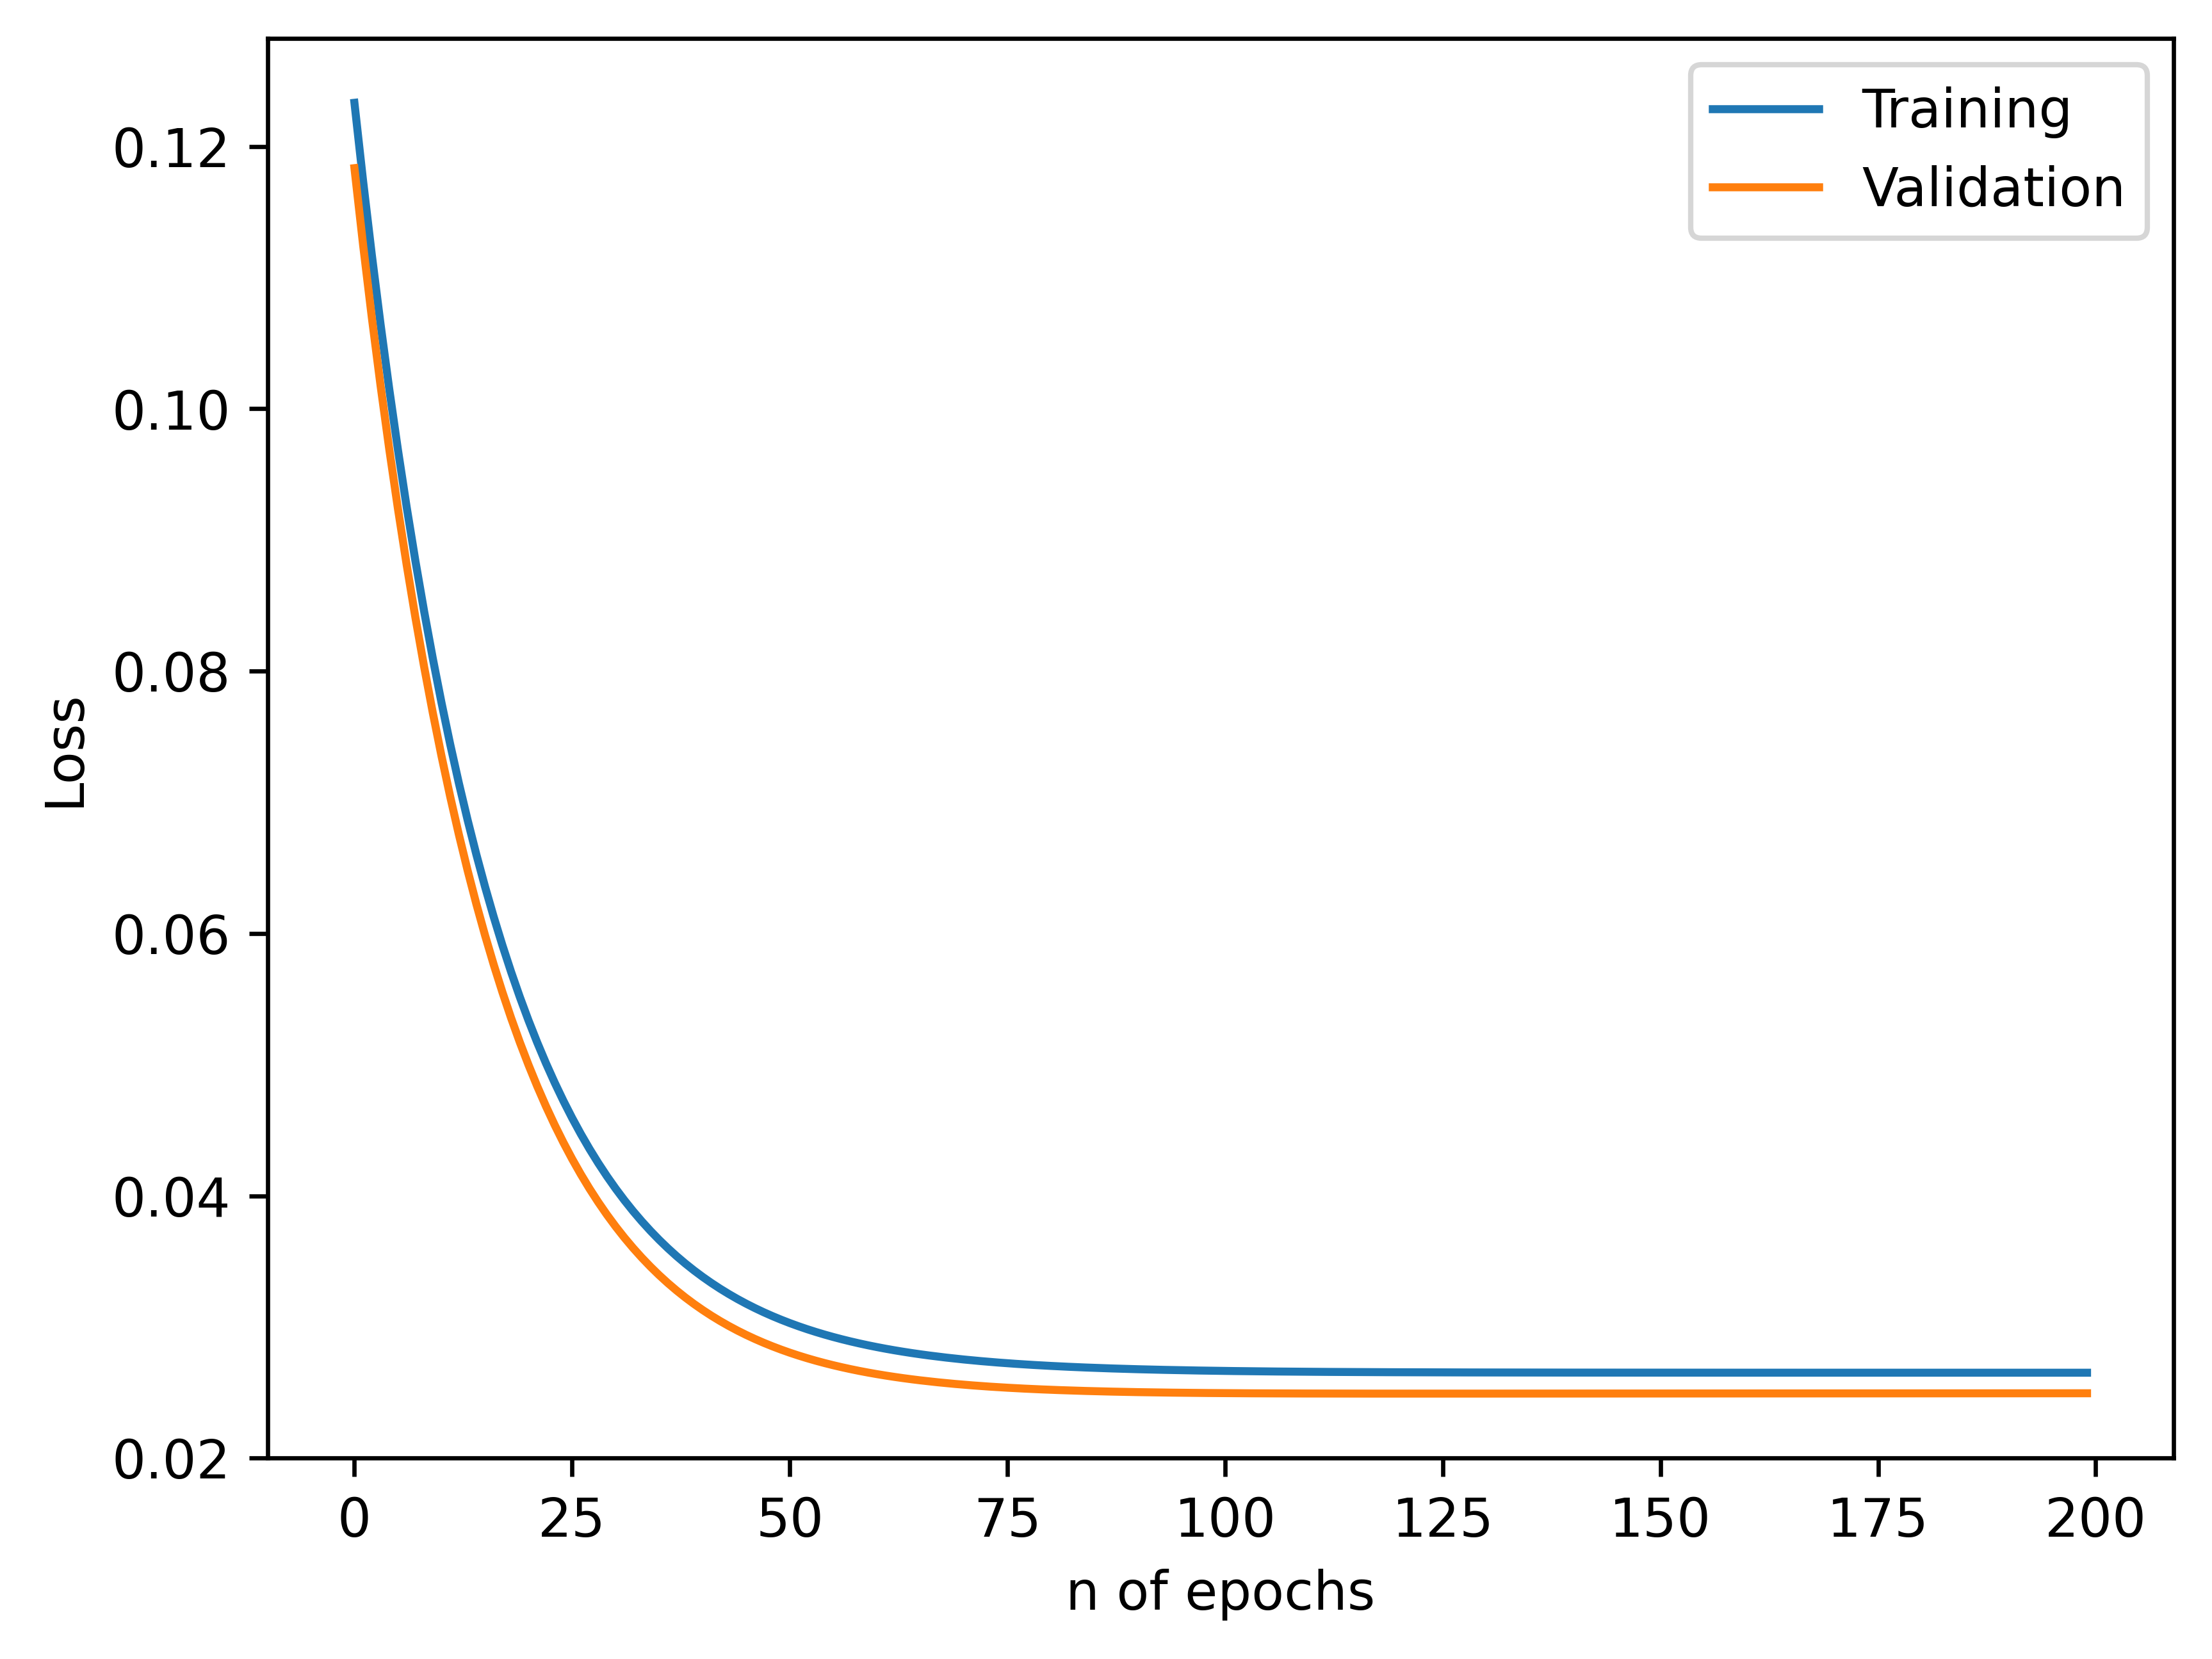

Epoch 1, Training Loss 0.125337, Validation Loss 0.119464 
Epoch 50, Training Loss 0.077532, Validation Loss 0.072836 
Epoch 100, Training Loss 0.052584, Validation Loss 0.048762 
Epoch 150, Training Loss 0.039863, Validation Loss 0.036674 
Epoch 200, Training Loss 0.033374, Validation Loss 0.030644 


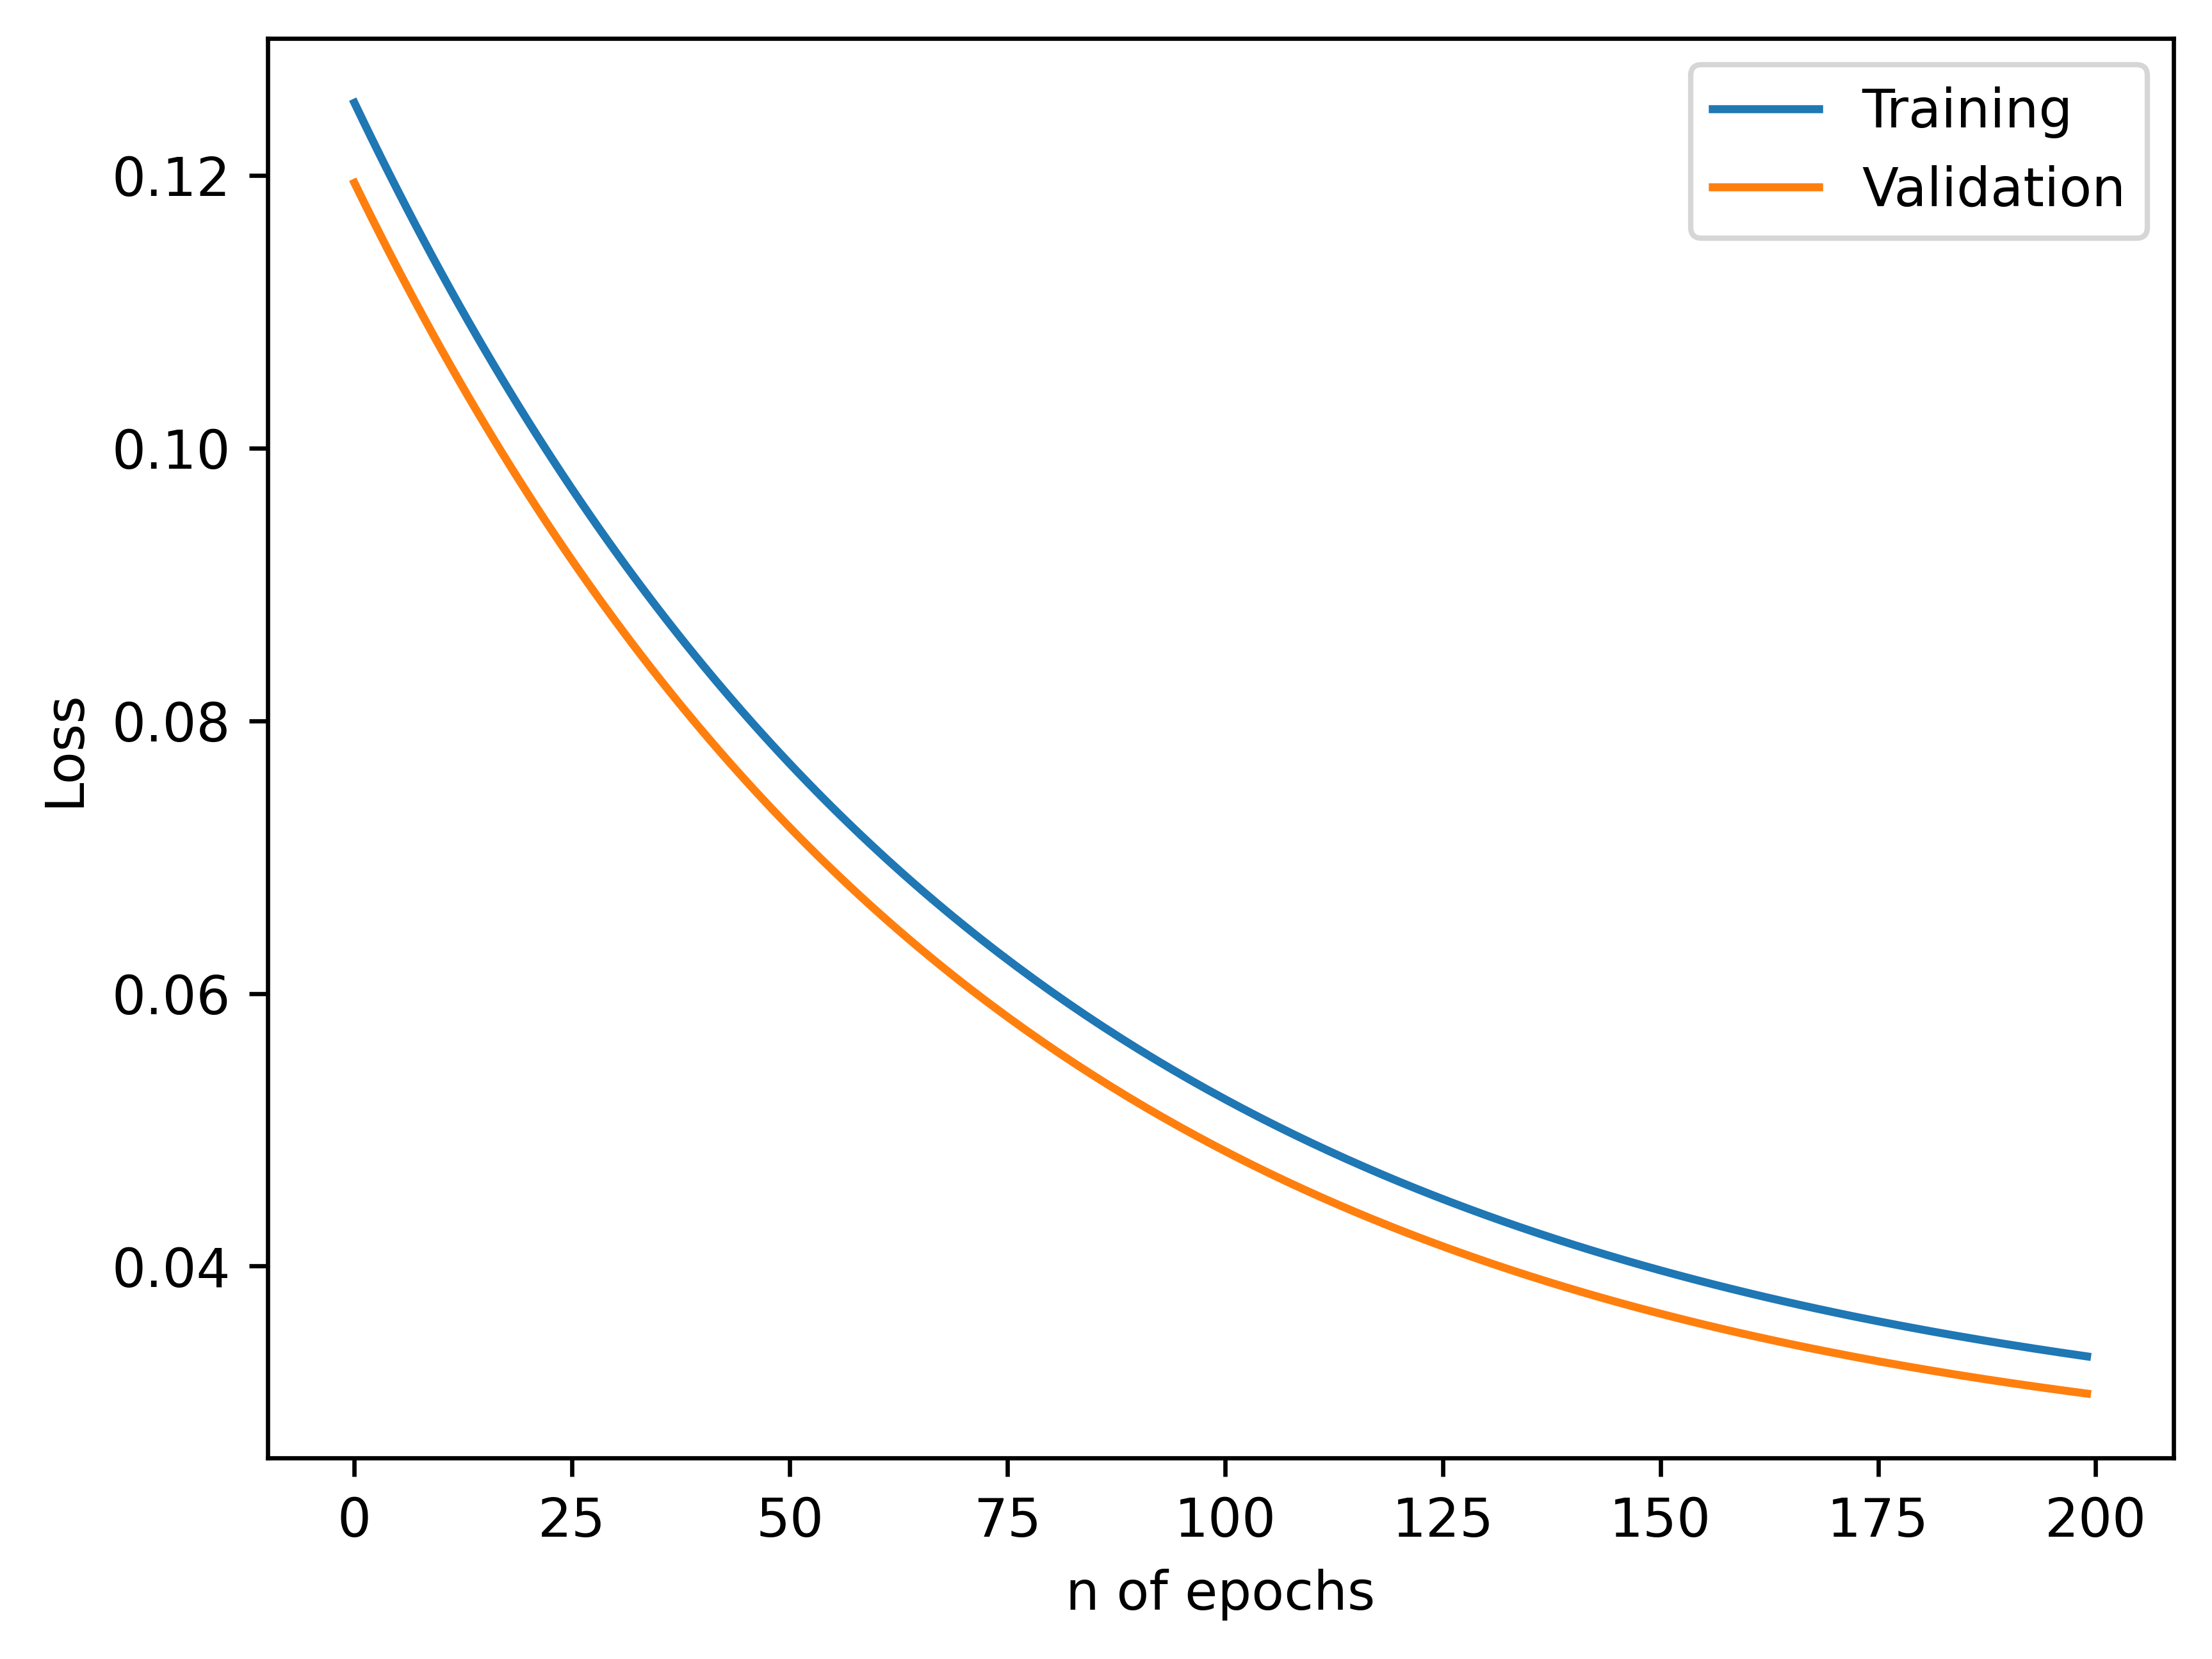

In [12]:
#3b, 3 hidden layers
rate = [.1,.05,.01,.005,.001]
min_loss = []
min_loss.append(10000)
for r in rate:
    seq_model2 = nn.Sequential(nn.Linear(5,8),
                              nn.Tanh(),
                              nn.Linear(8,16),
                              nn.Tanh(),
                              nn.Linear(16,32),
                              nn.Tanh(),
                              nn.Linear(32,64),
                              nn.Tanh(),
                              nn.Linear(64,1))
    
    optimizer = optim.SGD(seq_model2.parameters(), lr=r)

    train_loss, test_loss, train = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model2 , loss_fn = loss_fn, x_train = x_train, 
             x_test = x_test, y_train = y_train, y_test = y_test)

    if min(min_loss) > min(test_loss):
        min_loss = test_loss
        min_rate = r

    epochs = []
    for n in range(0,200):
        epochs.append(n)

    fig = plt.figure(dpi=600)
    plt.plot(epochs, train_loss, label = 'Training')
    plt.plot(epochs, test_loss, label = 'Validation')
    plt.ylabel("Loss")
    plt.xlabel("n of epochs")
    plt.legend()
    plt.show()

Epoch 1, Training Loss 0.155652, Validation Loss 0.151618 
Epoch 50, Training Loss 0.026746, Validation Loss 0.025126 
Epoch 100, Training Loss 0.026709, Validation Loss 0.025096 
Epoch 150, Training Loss 0.026678, Validation Loss 0.025071 
Epoch 200, Training Loss 0.026653, Validation Loss 0.025050 


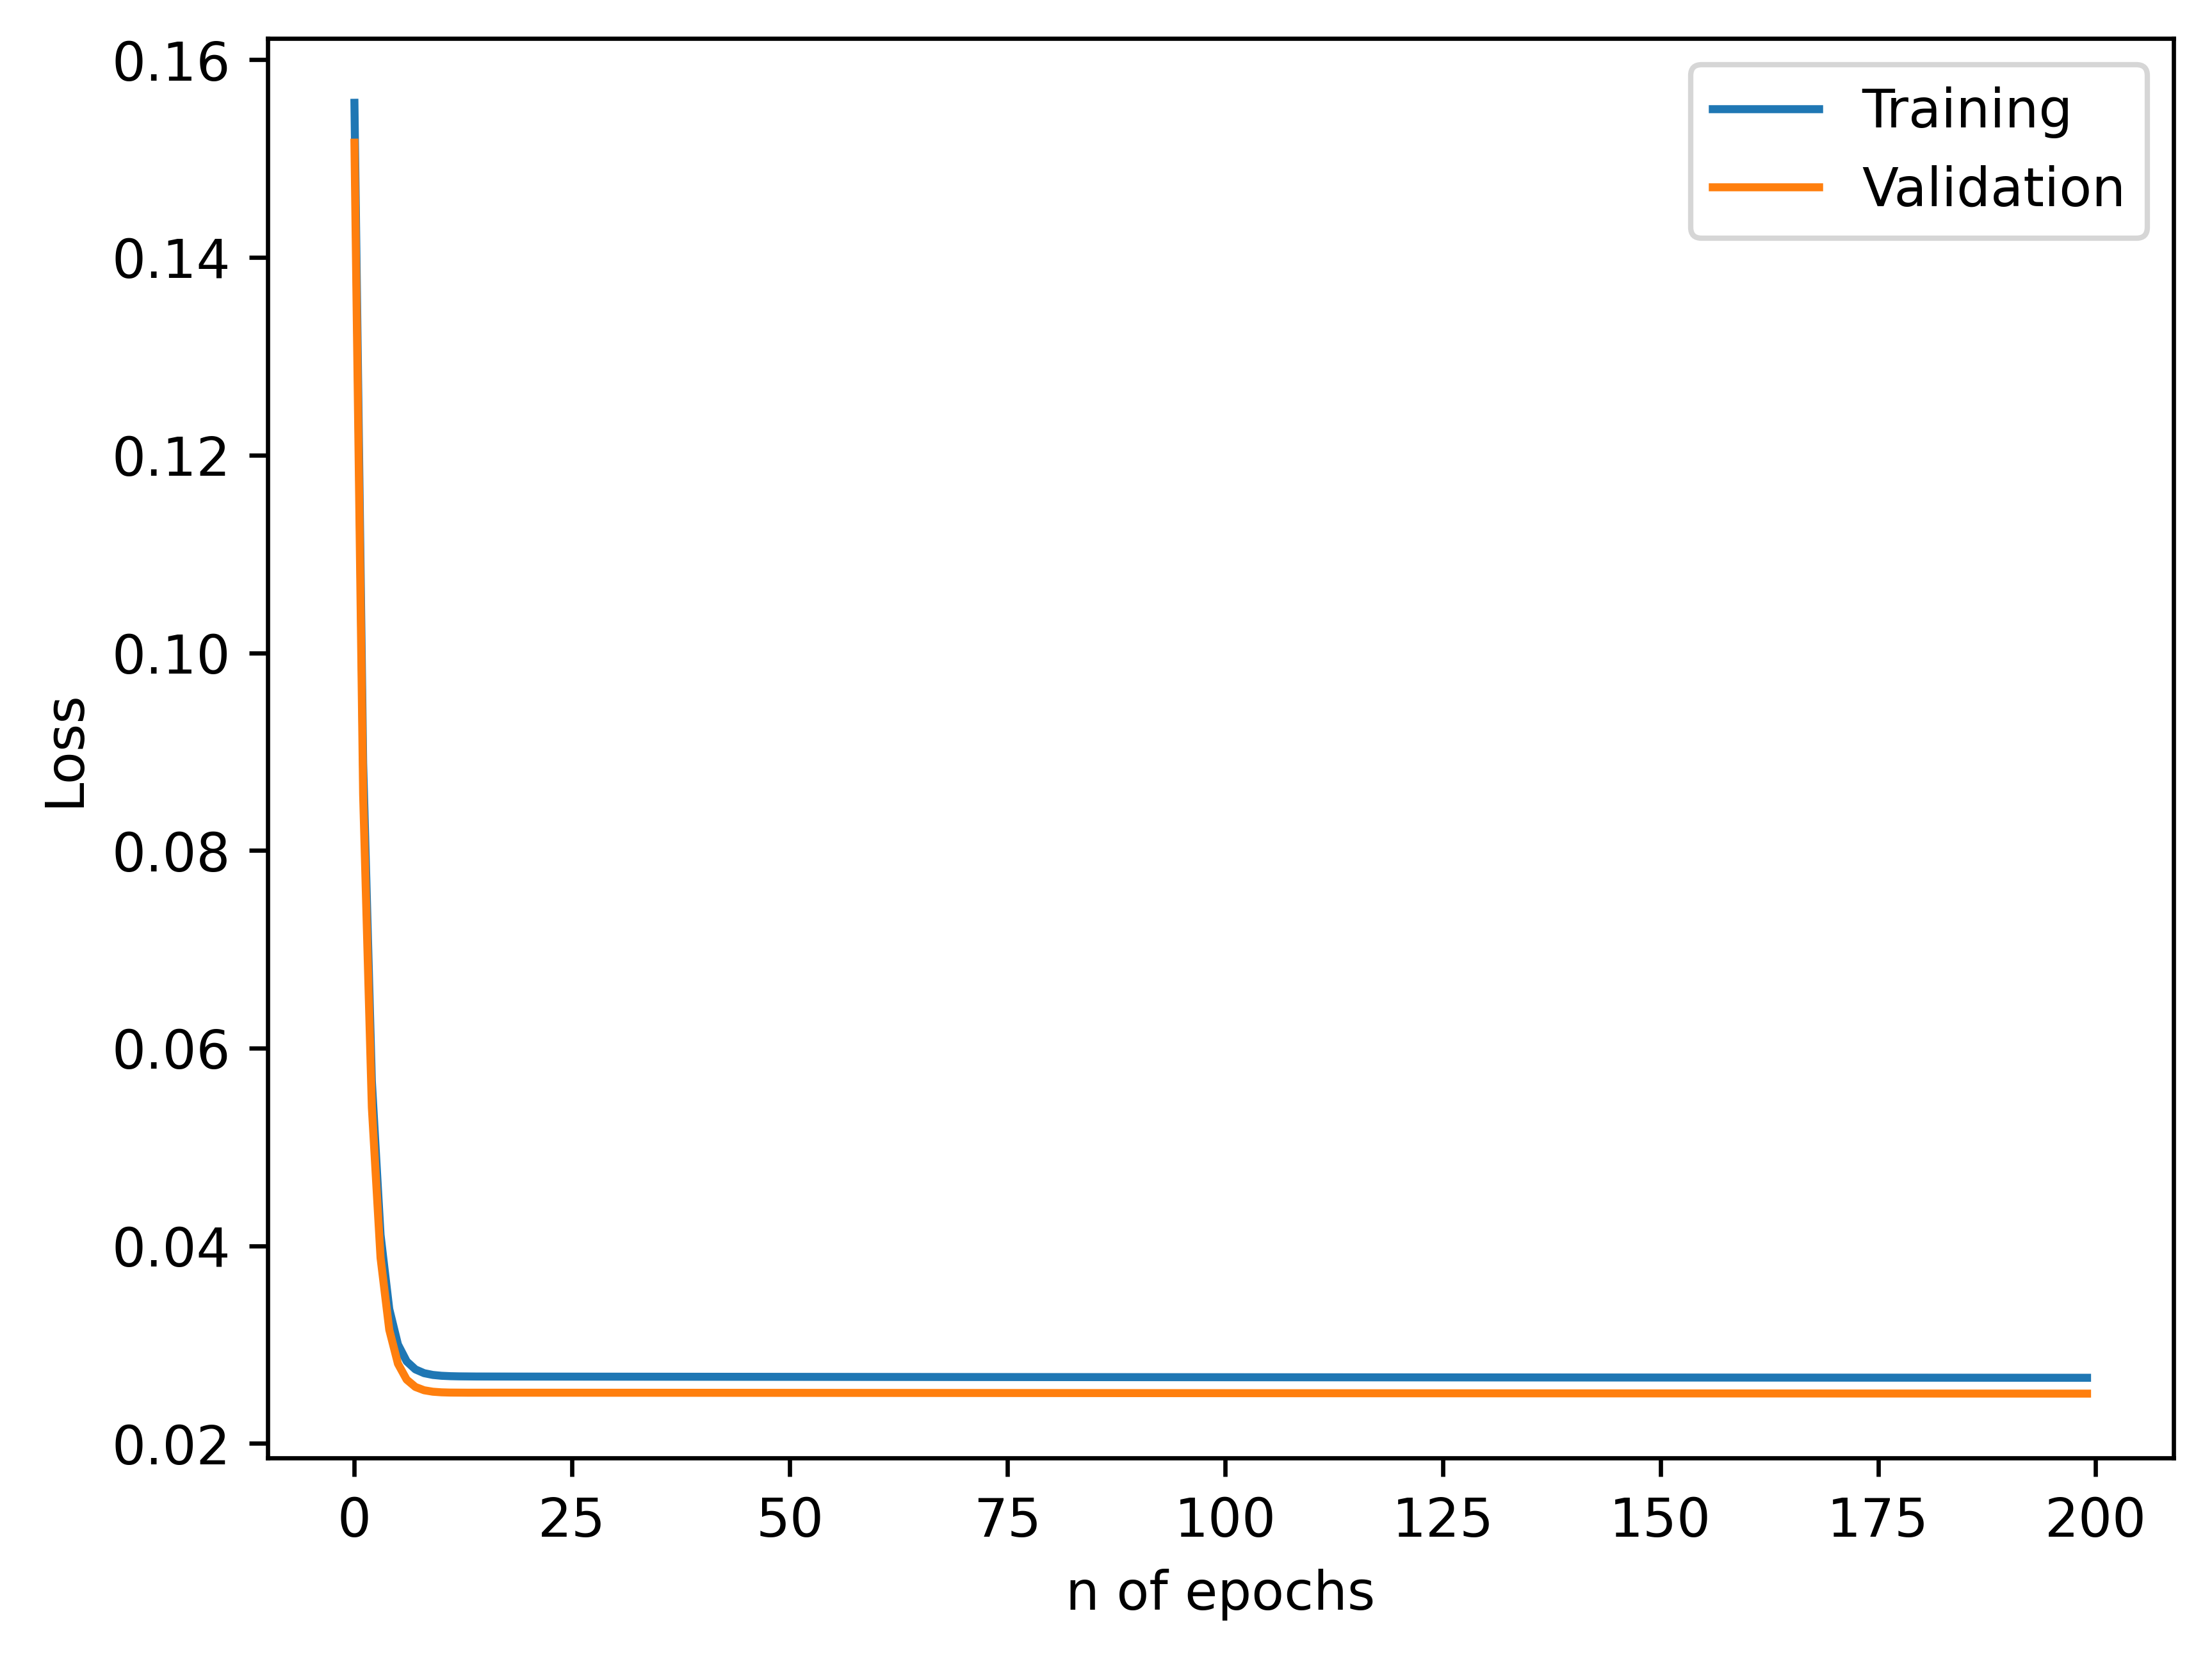

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=32, bias=True)
  (5): Tanh()
  (6): Linear(in_features=32, out_features=64, bias=True)
  (7): Tanh()
  (8): Linear(in_features=64, out_features=1, bias=True)
)


In [21]:
#3b, Using the best learning rate to minmize overfitting and optimize loss
r = .05
seq_model3b = nn.Sequential(nn.Linear(5,8),
                          nn.Tanh(),
                          nn.Linear(8,16),
                          nn.Tanh(),
                          nn.Linear(16,32),
                          nn.Tanh(),
                          nn.Linear(32,64),
                          nn.Tanh(),
                          nn.Linear(64,1))

optimizer = optim.SGD(seq_model3b.parameters(), lr=r)

train_loss, test_loss, train = training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model3b , loss_fn = loss_fn, x_train = x_train, 
         x_test = x_test, y_train = y_train, y_test = y_test)

if min(min_loss) > min(test_loss):
    min_loss = test_loss
    min_rate = r

epochs = []
for n in range(0,200):
    epochs.append(n)

fig = plt.figure(dpi=600)
plt.plot(epochs, train_loss, label = 'Training')
plt.plot(epochs, test_loss, label = 'Validation')
plt.ylabel("Loss")
plt.xlabel("n of epochs")
plt.legend()
plt.show()

print(seq_model3b)